# GSE112622 transcription TMP vs H3K36me3

See `GSE112622Experiment` in `epigenome` project.
This experiment provides information per gene.
For each gene:
* _PEAKS - number of peaks intersecting with gene body for TOOL
* _COVERAGE - information about percentage of gene body length covered by peaks for TOOL
* _RPM / _RPKM - normalized reads coverage in gene body
* _TPM / _FPKM - transcript per million reads provided by RSEM

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import scipy as sp
import os

In [11]:
FOLDER='/mnt/stripe/bio/experiments/gse112622'

df = pd.read_csv(os.path.join(FOLDER, 'data.tsv'), sep='\t', comment='#')
# Filter out only protein coding genes
df = df.loc[df['coding'] == 1]
print(f'Number of protein coding genes {len(df)}')

Number of protein coding genes 22365


In [12]:
df['loc'] = df['chr'] + ':' + df['start'].astype(str) + '-' + df['end'].astype(str)
df['len'] = df['end'] - df['start']
df.sort_values(by=['len'], ascending=False, inplace=True)
print('Longest genes')
display(df[['gene_symbol', 'loc', 'len']].reset_index(drop=True).iloc[:200,:])
print('Gene lengths')
print(df['len'].describe())

Longest genes


gene_symbol                       loc      len
0       Gm20388  chr8:119910840-124345722  4434882
1         Fgfr2  chr7:130162450-133123350  2960900
2         Ptprd    chr4:75941237-78211961  2270724
3           Dmd    chrX:82948869-85206141  2257272
4       Cntnap2    chr6:45059356-47304213  2244857
..          ...                       ...      ...
195        Grm5    chr7:87584167-88134907   550740
196       Pard3  chr8:127063892-127612286   548394
197       Tafa1    chr6:96113153-96657198   544045
198       Foxp2    chr6:14901348-15441977   540629
199      Large1    chr8:72814598-73353540   538942

[200 rows x 3 columns]

Gene lengths
count    2.236500e+04
mean     4.804548e+04
std      1.143071e+05
min      1.000000e+01
25%      6.128000e+03
50%      1.683300e+04
75%      4.420200e+04
max      4.434882e+06
Name: len, dtype: float64


In [4]:
# Ignore extemely long genes
df = df.iloc[200:, :]

# Peaks statistics

/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/macs2/SRR6929776_C57BL_6J_rep3379_broad0.1_peaks.broadPeak
count    7412.000000
mean       26.589746
std        14.233151
min         5.261772
25%        18.776520
50%        24.677712
75%        31.590445
max       507.014814
Name: rpkm, dtype: float64
Longest peaks SRR6929776_C57BL_6J_rep3379_broad0.1_peaks.broadPeak


loc   len
0               chrM:111-6436  6325
1            chrM:10989-16182  5193
2     chr11:88967990-88970686  2696
3      chrY:90737505-90740107  2602
4  chrUn_JH584304:26379-28937  2558

/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/macs2/SRR6929777_CAST_EiJ_rep3993_broad0.1_peaks.broadPeak
count    25169.000000
mean        27.229709
std         15.818084
min          3.601169
25%         19.126966
50%         24.846304
75%         32.625768
max        475.253692
Name: rpkm, dtype: float64
Longest peaks SRR6929777_CAST_EiJ_rep3993_broad0.1_peaks.broadPeak


loc   len
0     chr17:39843424-39847944  4520
1                chrM:99-4271  4172
2  chrUn_JH584304:26365-29479  3114
3       chr11:3184294-3187327  3033
4     chr10:80401519-80404322  2803

/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/sicer/SRR6929776_C57BL_6J_rep3379-W200-G600-E100.scoreisland
count    64690.000000
mean        11.353661
std          3.544880
min          5.583193
25%          9.770975
50%         11.047048
75%         12.576730
max        490.446104
Name: rpkm, dtype: float64
Longest peaks SRR6929776_C57BL_6J_rep3379-W200-G600-E100.scoreisland


loc     len
0    chr5:34803000-34927999  124999
1  chr5:121259000-121370599  111599
2  chr2:135329600-135440999  111399
3  chr6:108349000-108456799  107799
4  chrX:151833000-151935399  102399

/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/sicer/SRR6929777_CAST_EiJ_rep3993-W200-G600-E100.scoreisland
count    55960.000000
mean        11.852620
std          3.554425
min          5.745423
25%          9.998579
50%         11.455625
75%         13.169509
max        344.176450
Name: rpkm, dtype: float64
Longest peaks SRR6929777_CAST_EiJ_rep3993-W200-G600-E100.scoreisland


loc     len
0    chr2:28642800-28788199  145399
1   chr17:30339800-30483199  143399
2   chr15:72799400-72937599  138199
3  chr5:121250400-121383999  133599
4    chr4:32661400-32776399  114999

/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/span_tuned/SRR6929776_C57BL_6J_rep3379_200_0.001_10.peak
count    50961.000000
mean         9.380177
std          3.073890
min          4.884131
25%          7.571571
50%          8.908838
75%         10.656285
max        366.819603
Name: rpkm, dtype: float64
Longest peaks SRR6929776_C57BL_6J_rep3379_200_0.001_10.peak


loc     len
0   chr15:72631600-72994800  363200
1   chr12:75821000-76145800  324800
2  chr5:140004400-140319800  315400
3   chr10:26952600-27254600  302000
4   chr16:96665400-96966000  300600

/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/span_tuned/SRR6929777_CAST_EiJ_rep3993_200_0.001_10.peak
count    54971.000000
mean        10.597092
std          3.862057
min          5.068646
25%          8.447743
50%         10.071806
75%         11.928273
max        234.654786
Name: rpkm, dtype: float64
Longest peaks SRR6929777_CAST_EiJ_rep3993_200_0.001_10.peak


loc     len
0    chr17:30192600-30574200  381600
1    chr15:72632000-72963200  331200
2   chr5:140003600-140319800  316200
3     chr1:89584400-89899600  315200
4  chr14:121070000-121343200  273200

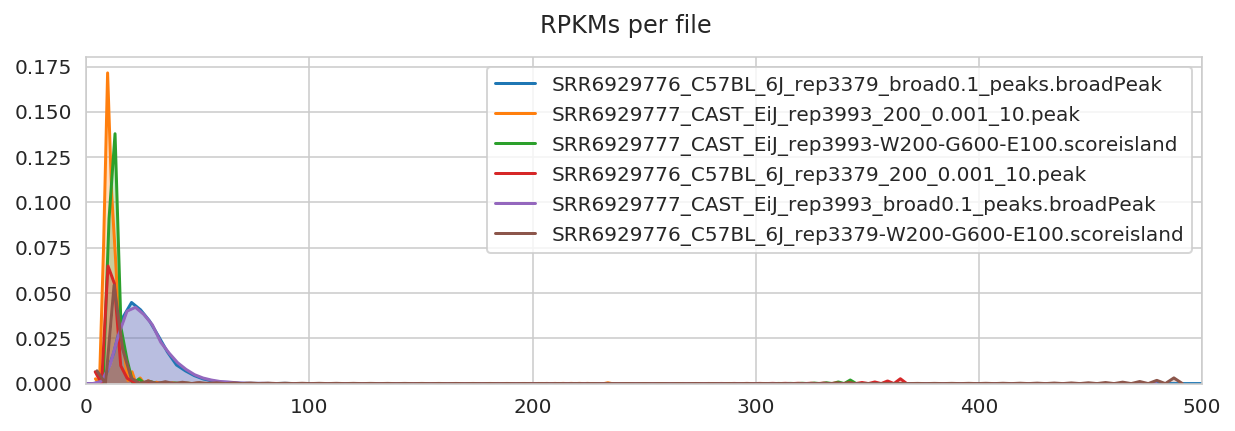

In [7]:
import glob
MACS_PEAKS = glob.glob('/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/macs2/*.broadPeak')
SICER_PEAKS = glob.glob('/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/sicer/*.scoreisland')
SPAN_PEAKS = glob.glob('/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/chipseq/span_tuned/*.peak')

ts = []
for peaksfile in MACS_PEAKS + SICER_PEAKS + SPAN_PEAKS:
    name = os.path.basename(peaksfile)
    if 'broadPeak' in name:
        caller = 'MACS2'
    elif 'scoreisland' in name:
        caller = 'SICER'
    else:
        caller = 'SPAN'
    t = pd.read_csv(peaksfile, sep='\t', header=None)
    t = t.iloc[:, :3]
    t.columns = ['chr', 'start', 'end']
    t['len'] = t['end'] - t['start']
    rpms = pd.read_csv(f'{peaksfile}.rpm', header=None)
    t['rpm'] = rpms.loc[:, 0]
    t['rpkm'] = t['rpm'] / (t['len'] / 1000)
    t['name'] = name
    t['caller'] = caller
    t.sort_values(by=['len'], ascending=False, inplace=True)
    t['loc'] = t['chr'] + ':' + t['start'].astype(str) + '-' + t['end'].astype(str)
    print(peaksfile)
    print(t['rpkm'].describe())
    print(f'Longest peaks {name}')
    display(t[['loc', 'len']].reset_index(drop=True).iloc[:5,:])
    ts.append(t)
t = pd.concat(ts)

plt.figure(figsize=(10, 3))
plt.xlim(0, 500)
plt.ylim(0, 0.18)
for name in set(t['name']):
    tc = t.loc[t['name'] == name]
    sns.kdeplot(tc['rpkm'], shade=True, label=name)
plt.suptitle(f'RPKMs per file')
plt.show()

loc        rpkm
30301           chrM:10800-16199  490.446104
30299                chrM:0-6799  481.649125
26932                chrM:0-4799  344.176450
8330       chr11:3184200-3199999  234.669638
14532  chr10:126511600-126511799  190.180353
44395     chr2:98666200-98667399  175.859612
26934           chrM:10800-16199  169.612036
50855     chr2:98666200-98667399  137.898809
22383    chr14:53929800-53930199  118.564819
39244   chr4:143984000-143986199  114.941556

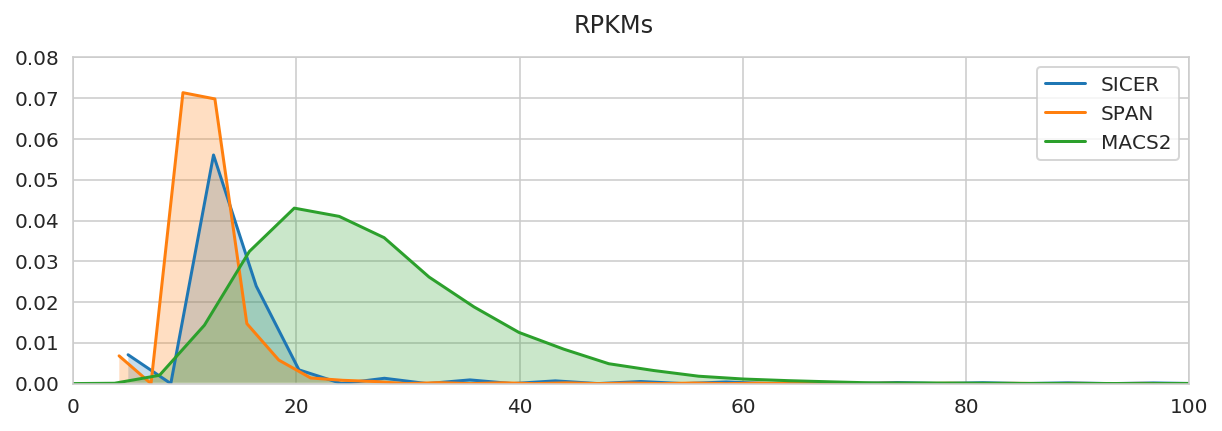

In [6]:
# Top SICER RPKM peak
display(t.loc[t['caller'] == 'SICER'].sort_values(by=['rpkm'], ascending=False)[['loc', 'rpkm']].iloc[:10, ])

plt.figure(figsize=(10, 3))
plt.xlim(0, 100)
plt.ylim(0, 0.08)
for caller in set(t['caller']):
    tc = t.loc[t['caller'] == caller]
    sns.kdeplot(tc['rpkm'], shade=True, label=caller)
plt.suptitle(f'RPKMs')
plt.show()

In [376]:
# Ignore mitochondrial chromosome
df = df.loc[df['chr']!='chrM']

SICER
count    120650.000000
mean       7502.882304
std        7379.634177
min         199.000000
25%        3199.000000
50%        5199.000000
75%        8799.000000
max      145399.000000
Name: len, dtype: float64
SPAN
count    105932.000000
mean      12222.652249
std       19817.047271
min         200.000000
25%        1800.000000
50%        5000.000000
75%       14000.000000
max      381600.000000
Name: len, dtype: float64


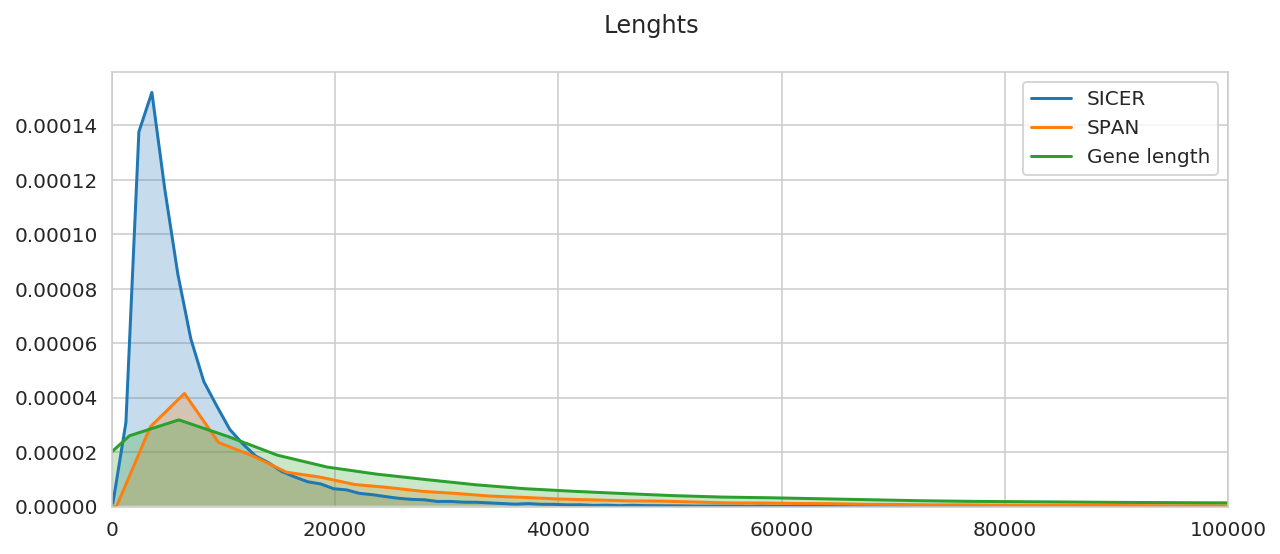

In [377]:
# Lenghts distribution
plt.figure(figsize=(10, 4))
for caller in ['SICER', 'SPAN']:
    tc = t.loc[t['caller'] == caller]
    print(caller)
    print(tc['len'].describe())
    sns.kdeplot(tc['len'], shade=True, label=caller)

sns.kdeplot(df['len'], shade=True, label='Gene length')
plt.xlim(0, 100000)
plt.suptitle(f'Lenghts')
plt.show()

# H3K36me3 correspondence between conditions

In [378]:
print('Compute correlation between intersection of peak and gene between 2 replicates')
TOOLS = ["MACS2", "SICER", "SPAN"]
for tool in TOOLS:
    for sample in [0, 1]:
        df['k36me3_{}_intersect_{}'.format(tool, sample)] = df['k36me3_{}_PEAKS_{}'.format(tool, sample)] > 0
    print(tool + '\t' + str(sp.stats.pearsonr(
        df['k36me3_{}_intersect_0'.format(tool)],
        df['k36me3_{}_intersect_1'.format(tool)])[0]))

Compute correlation between intersection of peak and gene between 2 replicates
MACS2	0.3459339215980932
SICER	0.7708711204347205
SPAN	0.775120406910172


Processing RPKM


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Processing RPKM without outliers


gene_id gene_symbol  coding    chr      start        end  \
8516   ENSMUSG00000020457        Drg1       1  chr11    3187359    3266415   
49485  ENSMUSG00000023764        Sfi1       1  chr11    3131849    3193463   
38499  ENSMUSG00000044783       Hjurp       1   chr1   88262470   88277633   
13717  ENSMUSG00000094786     Gm14403       1   chr2  177498214  177509763   
13749  ENSMUSG00000078902     Gm14443       1   chr2  175166254  175175871   
13650  ENSMUSG00000095362     Gm14325       1   chr2  177831790  177840336   
10905  ENSMUSG00000075015     Gm10801       1   chr2   98662236   98664083   
43400  ENSMUSG00000055430      Nap1l5       1   chr6   58905232   58907076   
10904  ENSMUSG00000075014     Gm10800       1   chr2   98666546   98667301   
10583  ENSMUSG00000068181     Gm10234       1   chr6   95322111   95322210   
15793  ENSMUSG00000091195     Gm17332       1  chr11   31182375   31182462   
52415  ENSMUSG00000076918      Traj11       1  chr14   54207138   54207197   
52417  ENSMUSG00000076916      Traj13       1  chr14   54205740   54205797   
52635  ENSMUSG00000076487     Trbj1-5       1   chr6   41535083   41535133   

       FPKM_0_0  FPKM_0_1  FPKM_1_0  FPKM_1_1  ...  k36me3_SPAN_PEAKS_0  \
8516      17.07     20.18     34.08     28.29  ...                  2.0   
49485      9.01     12.84     58.64     52.29  ...                  4.0   
38499    215.89    165.12    147.99    142.56  ...                  1.0   
13717      0.83      0.75      5.38      3.20  ...                  1.0   
13749      0.12      0.18      0.15      0.24  ...                  1.0   
13650      1.34      2.46     26.27     28.42  ...                  1.0   
10905      0.61      1.18      2.18      3.06  ...                  1.0   
43400      1.34      0.47      0.33      0.28  ...                  1.0   
10904      4.41      3.01      6.94      9.60  ...                  1.0   
10583      0.00      0.00      0.00      0.00  ...                  1.0   
15793      0.00      0.00      0.00      0.00  ...                  1.0   
52415      0.00      0.00      0.00      0.00  ...                  1.0   
52417      0.00      0.00      0.00      0.00  ...                  1.0   
52635      0.00      0.00      0.00      0.00  ...                  1.0   

       k36me3_SPAN_PEAKS_1                       loc    len  \
8516                   2.0     chr11:3187359-3266415  79056   
49485                  7.0     chr11:3131849-3193463  61614   
38499                  1.0    chr1:88262470-88277633  15163   
13717                  1.0  chr2:177498214-177509763  11549   
13749                  1.0  chr2:175166254-175175871   9617   
13650                  1.0  chr2:177831790-177840336   8546   
10905                  1.0    chr2:98662236-98664083   1847   
43400                  1.0    chr6:58905232-58907076   1844   
10904                  1.0    chr2:98666546-98667301    755   
10583                  1.0    chr6:95322111-95322210     99   
15793                  1.0   chr11:31182375-31182462     87   
52415                  0.0   chr14:54207138-54207197     59   
52417                  0.0   chr14:54205740-54205797     57   
52635                  1.0    chr6:41535083-41535133     50   

       k36me3_MACS2_intersect_0  k36me3_MACS2_intersect_1  \
8516                       True                      True   
49485                      True                      True   
38499                      True                      True   
13717                      True                      True   
13749                     False                      True   
13650                      True                      True   
10905                      True                      True   
43400                     False                     False   
10904                      True                      True   
10583                     False                     False   
15793                     False                     False   
52415                     False            

Filter dataframe by RPKM


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

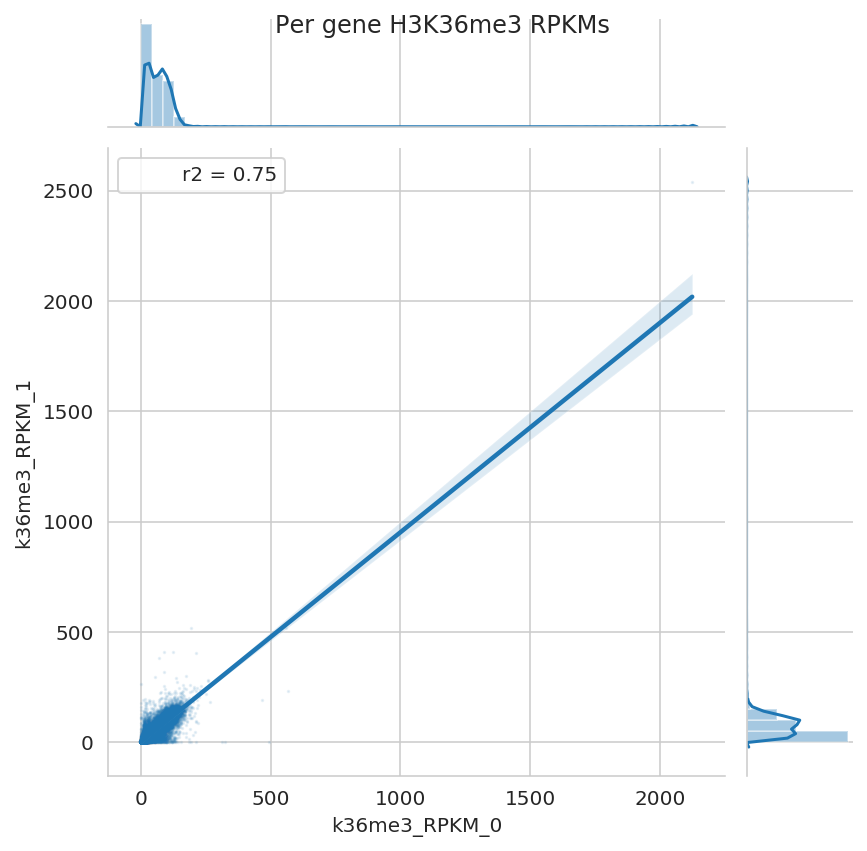

<Figure size 360x360 with 0 Axes>

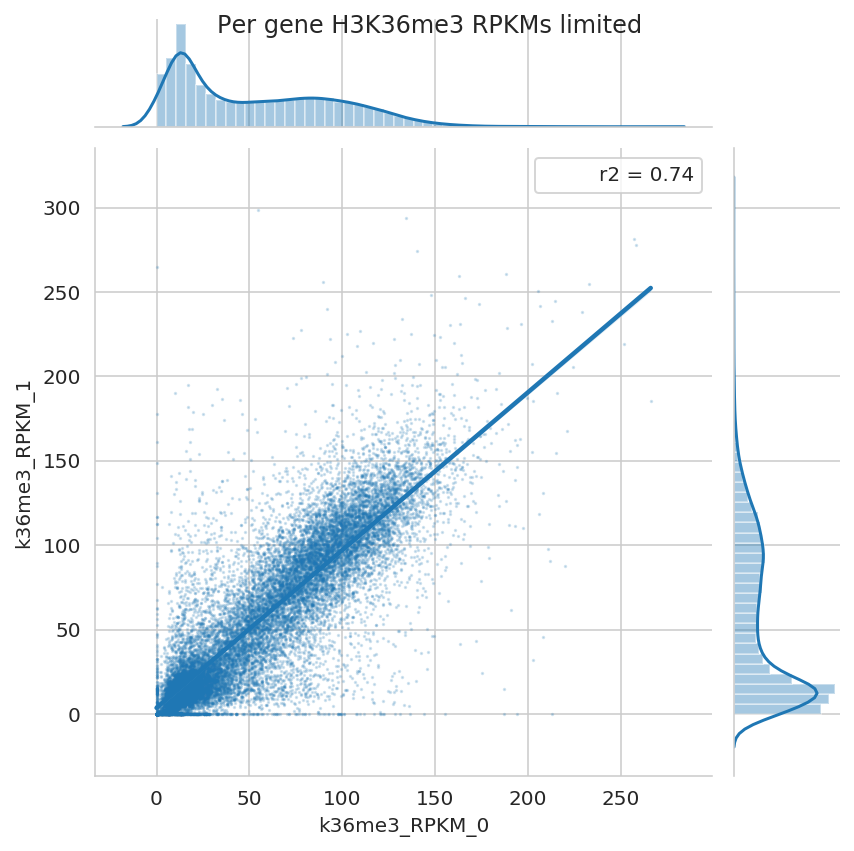

In [379]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

print('Processing RPKM')
with PdfPages(os.path.join(FOLDER, 'gse112622_rpkm_all.pdf')) as pdf:        
    plt.figure(figsize=(10, 10))
    sns.jointplot(df['k36me3_RPKM_0'], 
                  df['k36me3_RPKM_1'], kind="reg", stat_func=r2,
                 joint_kws = {'scatter_kws':dict(alpha=0.1, s=0.5)})
    plt.suptitle('Per gene H3K36me3 RPKMs')    
    pdf.savefig()

print('Processing RPKM without outliers')
rpkm_filter = np.logical_and(df['k36me3_RPKM_0'] < 300, 
                             df['k36me3_RPKM_1'] < 300)
display(df.loc[np.logical_not(rpkm_filter)])

print('Filter dataframe by RPKM')
df = df.loc[rpkm_filter]

with PdfPages(os.path.join(FOLDER, 'gse112622_rpkm.pdf')) as pdf:        
    plt.figure(figsize=(5, 5))
    sns.jointplot(df['k36me3_RPKM_0'], 
                  df['k36me3_RPKM_1'], kind="reg", stat_func=r2,
                 joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5)})
    plt.suptitle('Per gene H3K36me3 RPKMs limited')
    pdf.savefig()

# H3K36me3 peaks and coverage correspondence

Processing MACS2


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Done gse112622_MACS2_coverage.pdf


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Done, gse112622_MACS2_peaks.pdf
Processing SICER


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Done gse112622_SICER_coverage.pdf


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Done, gse112622_SICER_peaks.pdf
Processing SPAN


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Done gse112622_SPAN_coverage.pdf


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Done, gse112622_SPAN_peaks.pdf


<Figure size 360x360 with 0 Axes>

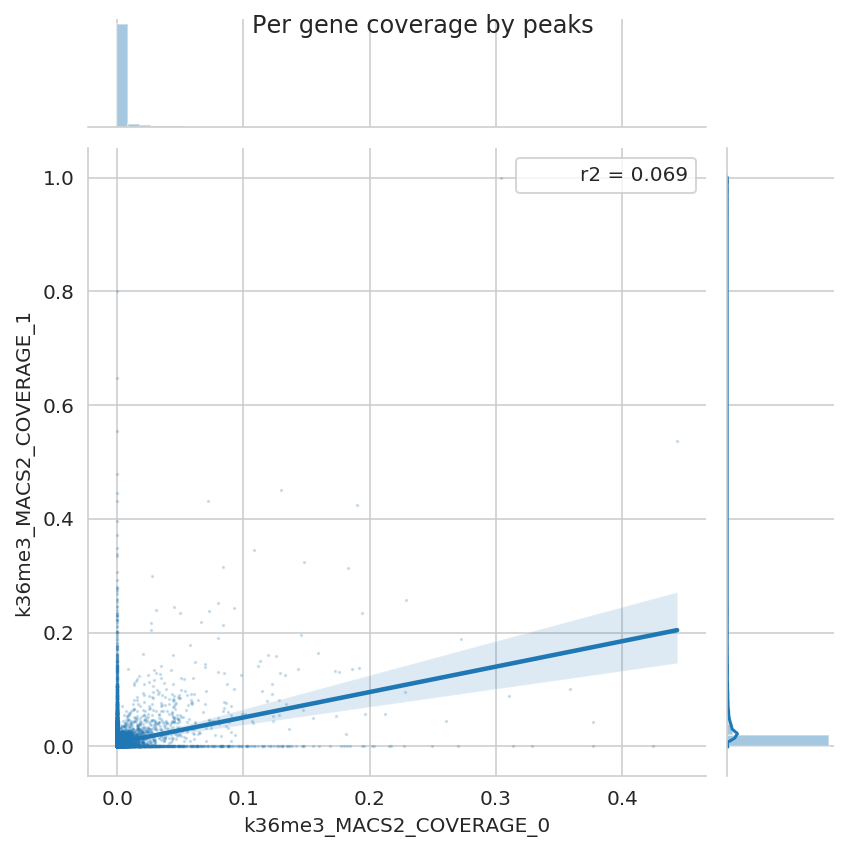

<Figure size 360x360 with 0 Axes>

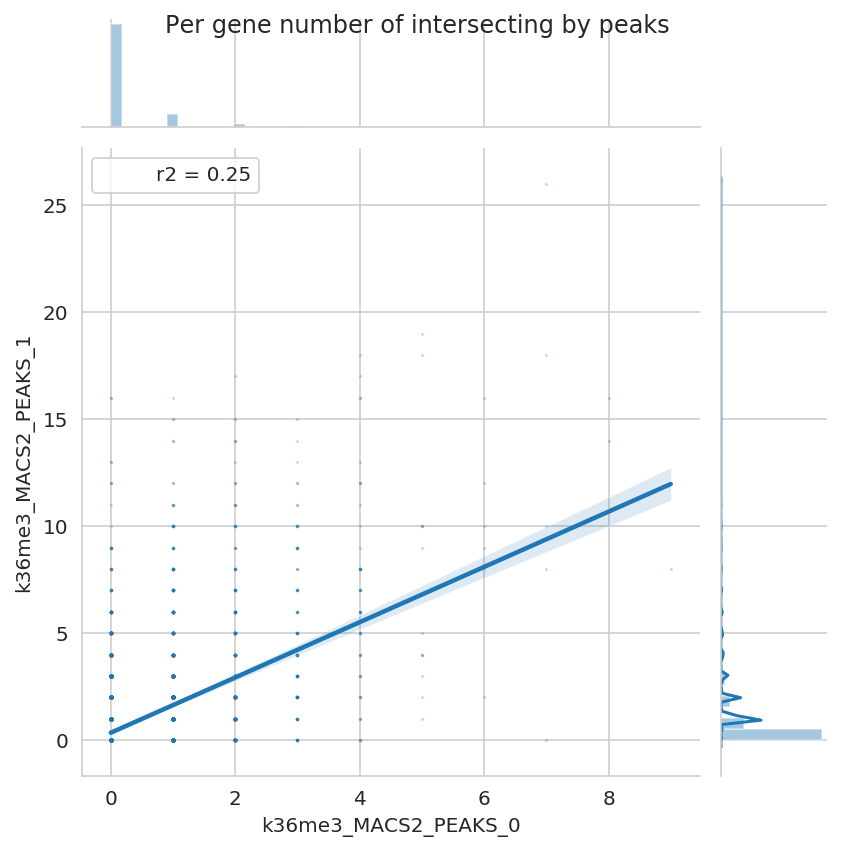

<Figure size 360x360 with 0 Axes>

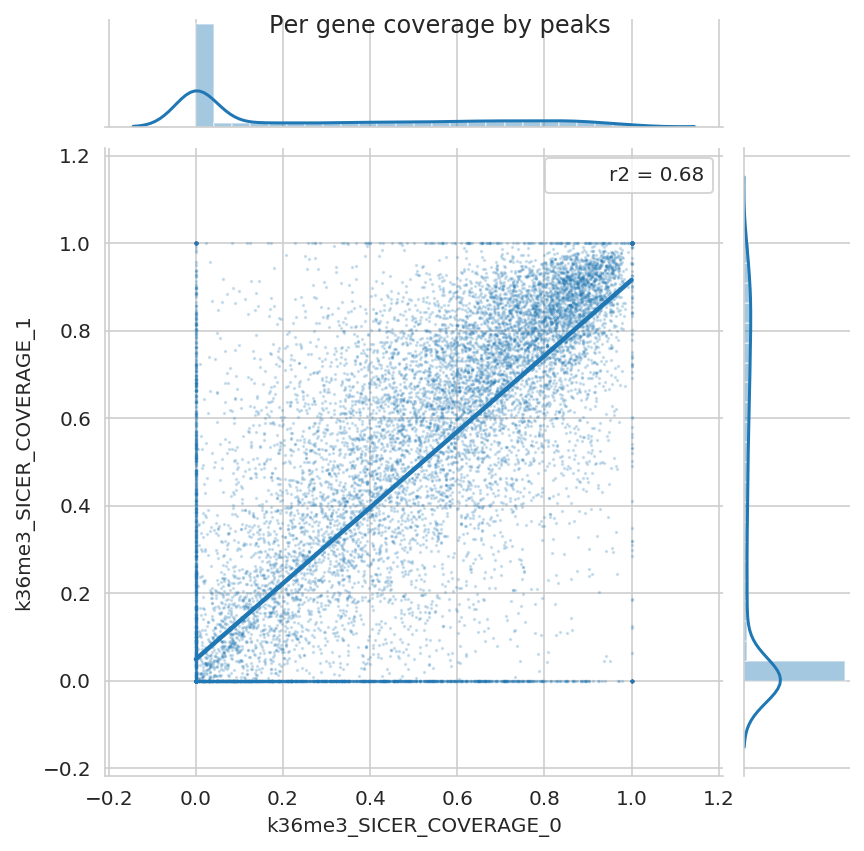

<Figure size 360x360 with 0 Axes>

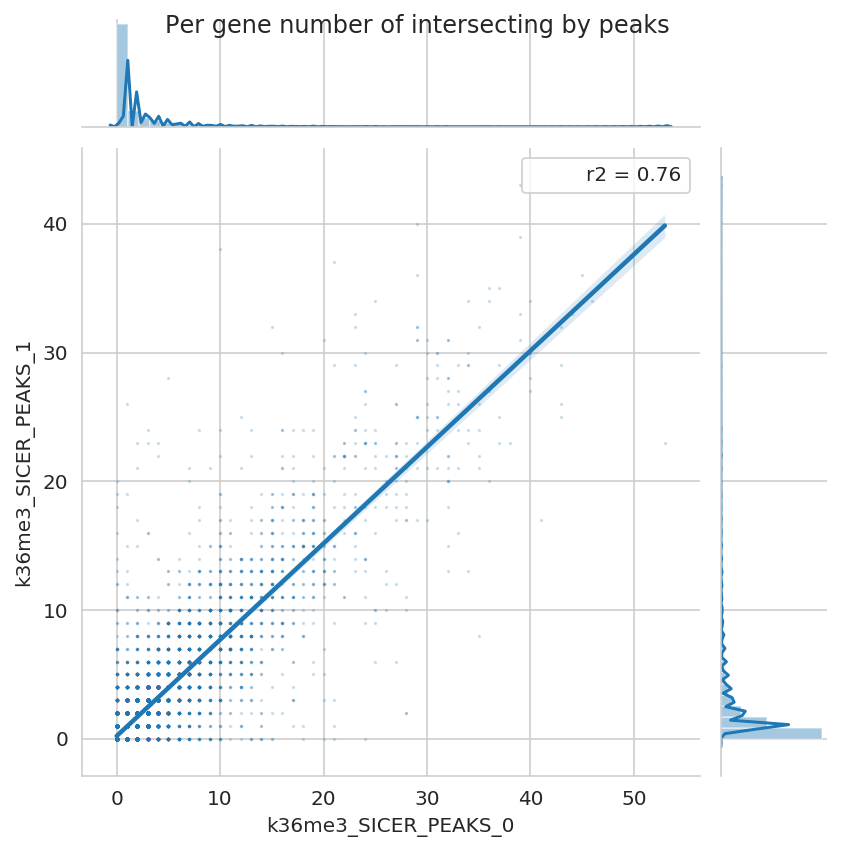

<Figure size 360x360 with 0 Axes>

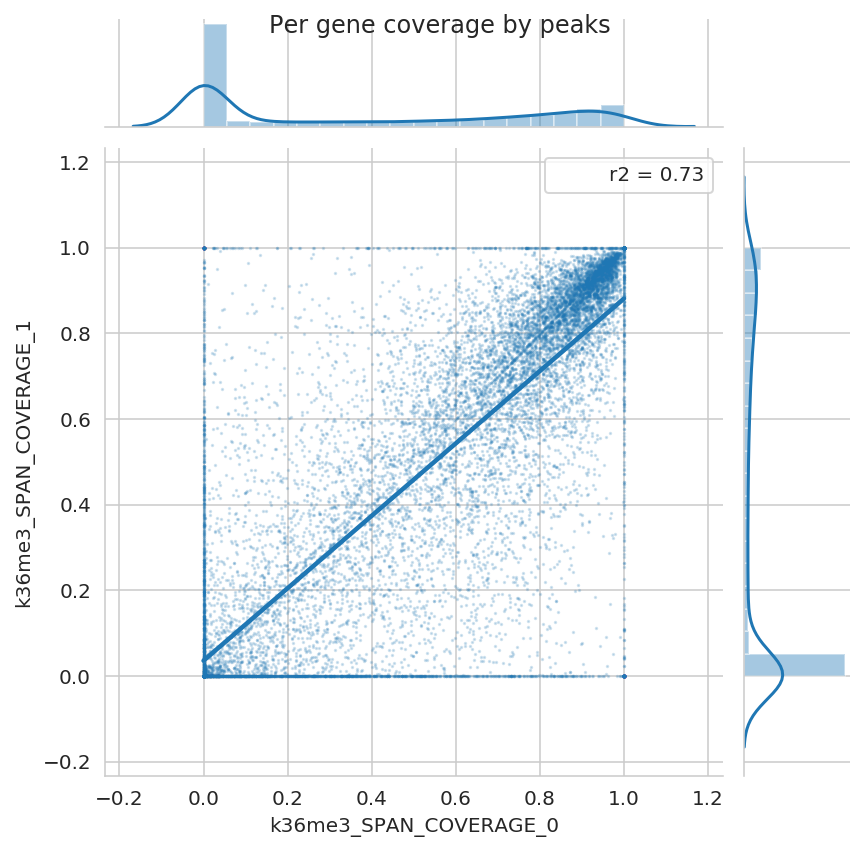

<Figure size 360x360 with 0 Axes>

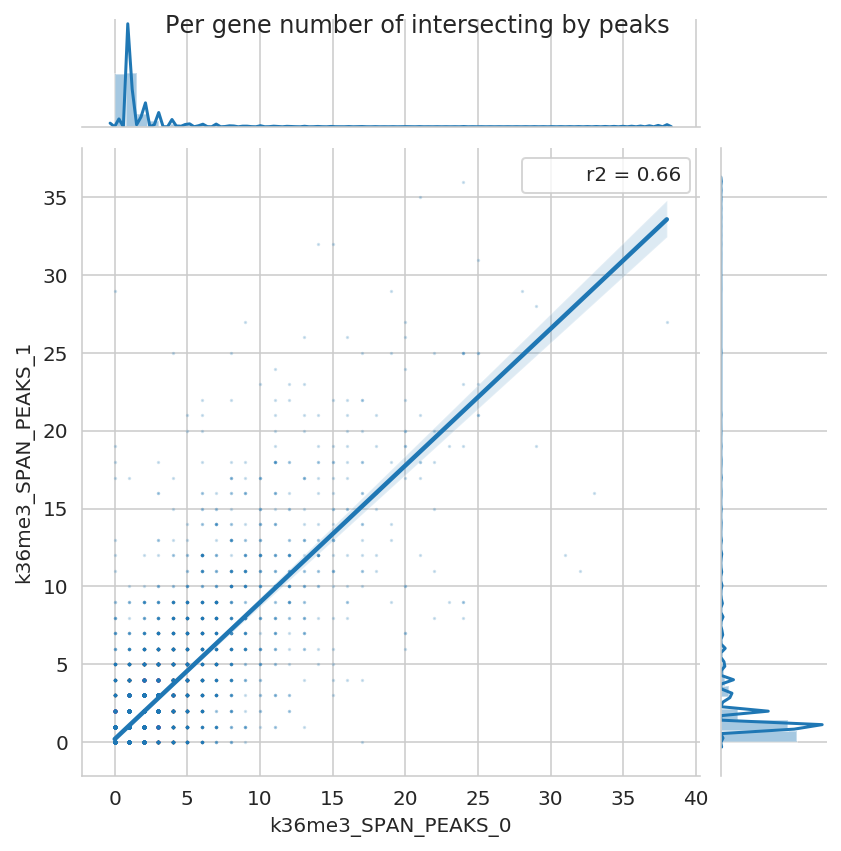

In [380]:
TOOLS = ["MACS2", "SICER", "SPAN"]
for tool in TOOLS:
    print('Processing', tool)
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_coverage.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        sns.jointplot(df['k36me3_{}_COVERAGE_0'.format(tool)], 
                      df['k36me3_{}_COVERAGE_1'.format(tool)], kind="reg", stat_func=r2,
                      joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5)})
        plt.suptitle('Per gene coverage by peaks')
        pdf.savefig()
        print('Done gse112622_{}_coverage.pdf'.format(tool))
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_peaks.pdf'.format(tool))) as pdf:        
        plt.figure(figsize=(5, 5))
        sns.jointplot(df['k36me3_{}_PEAKS_0'.format(tool)], 
                      df['k36me3_{}_PEAKS_1'.format(tool)], kind="reg", stat_func=r2,
                     joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5)})
        plt.suptitle('Per gene number of intersecting by peaks')
        pdf.savefig()
        print('Done, gse112622_{}_peaks.pdf'.format(tool))

# RNA-Seq correspondence between conditions and replicates

/home/user/anaconda/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 360x360 with 0 Axes>

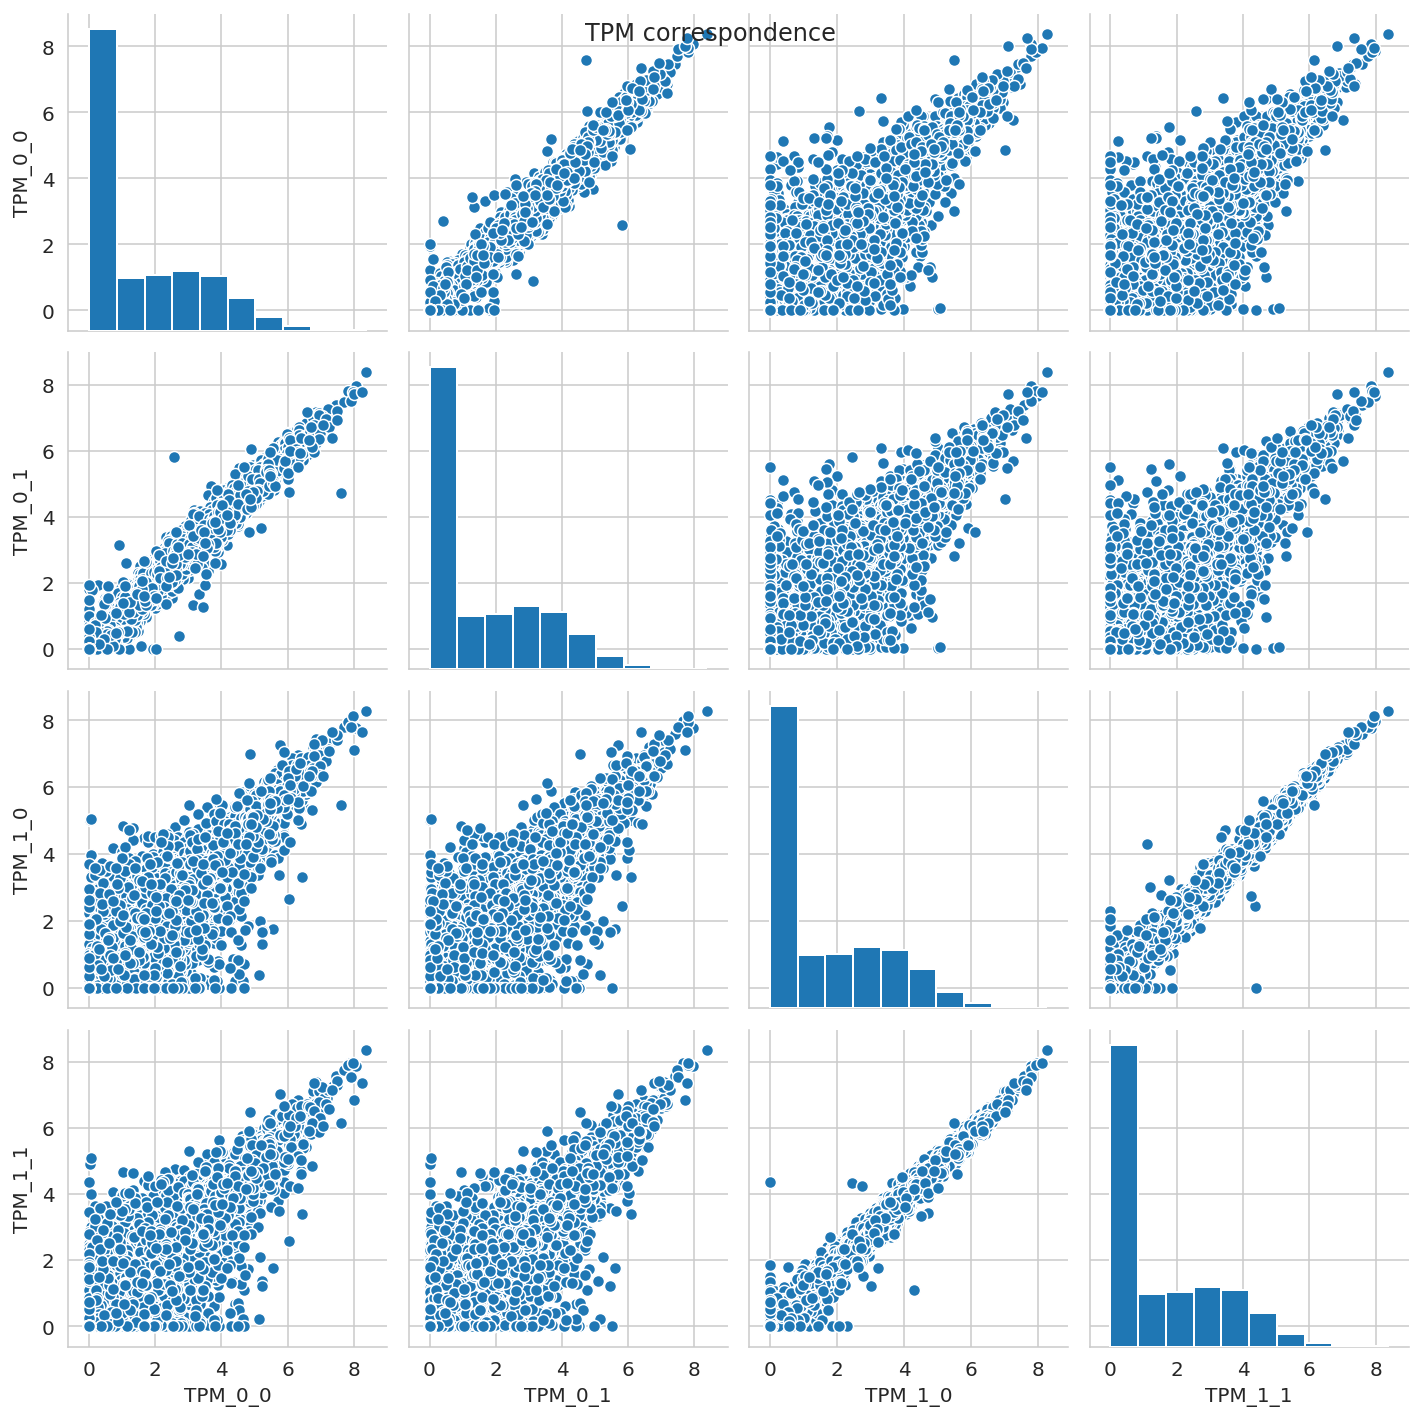

<Figure size 360x360 with 0 Axes>

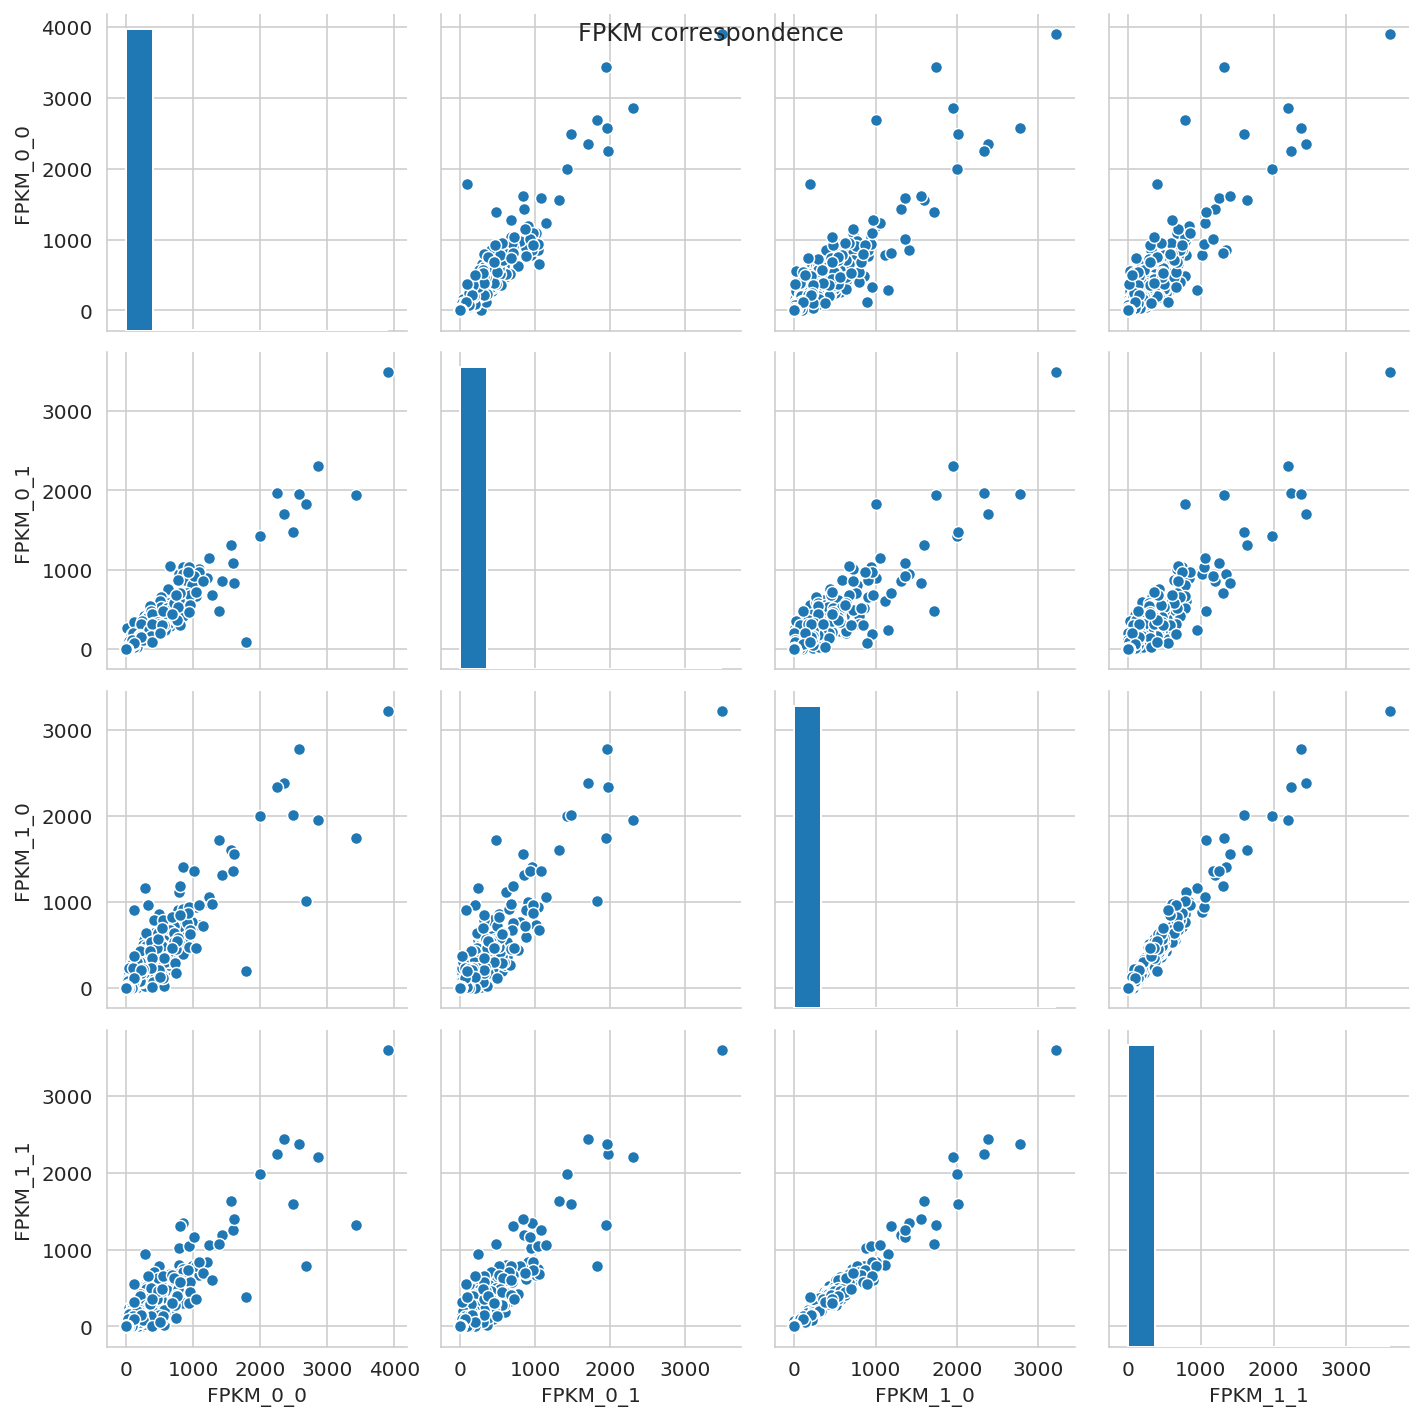

In [381]:
# # Quantile normalization
# def quantile(df):
#     dfq = df.copy()
#     #compute rank
#     dic = {}
#     for col in dfq:
#         dic.update({col : sorted(dfq[col])})
#     sorted_df = pd.DataFrame(dic)
#     rank = sorted_df.mean(axis = 1).tolist()
#     #sort
#     for col in dfq:
#         t = np.searchsorted(np.sort(dfq[col]), dfq[col])
#         dfq[col] = [rank[i] for i in t]
#     return dfq

dfq = df[['gene_id', 'FPKM_0_0', 'FPKM_0_1', 'FPKM_1_0', 'FPKM_1_1']]

# Log2 normalize 
for c in ['TPM_0_0', 'TPM_0_1', 'TPM_1_0', 'TPM_1_1']:
    dfq[c] = np.log1p(df[c])

# Quantile normalize
# dfq = quantile(dfq)

with PdfPages(os.path.join(FOLDER, 'gse112622_tpm.pdf')) as pdf:
    plt.figure(figsize=(5, 5))
    sns.pairplot(dfq[['TPM_0_0', 'TPM_0_1', 'TPM_1_0', 'TPM_1_1']])
    plt.tight_layout()
    plt.suptitle('TPM correspondence')
    pdf.savefig()

with PdfPages(os.path.join(FOLDER, 'gse112622_fpkm.pdf')) as pdf:
    plt.figure(figsize=(5, 5))
    sns.pairplot(dfq[['FPKM_0_0', 'FPKM_0_1', 'FPKM_1_0', 'FPKM_1_1']])
    plt.tight_layout()
    plt.suptitle('FPKM correspondence')
    pdf.savefig()    

# Average expression / K36me3 values for condition

In [382]:
dfq['TPM_0'] = (dfq['TPM_0_0'] + dfq['TPM_0_1']) / 2
dfq['TPM_1'] = (dfq['TPM_1_0'] + dfq['TPM_1_1']) / 2
dfq['TPM'] = (dfq['TPM_0'] + dfq['TPM_1']) / 2

dfq['FPKM_0'] = (dfq['FPKM_0_0'] + dfq['FPKM_0_1']) / 2
dfq['FPKM_1'] = (dfq['FPKM_1_0'] + dfq['FPKM_1_1']) / 2
dfq['FPKM'] = (dfq['FPKM_0'] + dfq['FPKM_1']) / 2

# Top expressed genes and not expressed genes
print('Top expressed genes')
print('\t'.join(dfq.sort_values(by=['TPM'], ascending=False)[:20]['gene_id']))

print('Top not expressed genes')
print('\t'.join(dfq.sort_values(by=['TPM'])[:20]['gene_id']))

dff = df.copy()
dff[dfq.columns] = dfq

Top expressed genes
ENSMUSG00000041995	ENSMUSG00000042279	ENSMUSG00000030246	ENSMUSG00000029223	ENSMUSG00000018238	ENSMUSG00000063954	ENSMUSG00000057534	ENSMUSG00000034758	ENSMUSG00000040935	ENSMUSG00000019505	ENSMUSG00000049539	ENSMUSG00000063935	ENSMUSG00000045291	ENSMUSG00000004948	ENSMUSG00000016626	ENSMUSG00000074895	ENSMUSG00000074403	ENSMUSG00000039108	ENSMUSG00000041857	ENSMUSG00000073294
Top not expressed genes
ENSMUSG00000094957	ENSMUSG00000104876	ENSMUSG00000075066	ENSMUSG00000071000	ENSMUSG00000083706	ENSMUSG00000050963	ENSMUSG00000070460	ENSMUSG00000099611	ENSMUSG00000067627	ENSMUSG00000111567	ENSMUSG00000057170	ENSMUSG00000047678	ENSMUSG00000112023	ENSMUSG00000055571	ENSMUSG00000020270	ENSMUSG00000021345	ENSMUSG00000060918	ENSMUSG00000075079	ENSMUSG00000062105	ENSMUSG00000043855


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

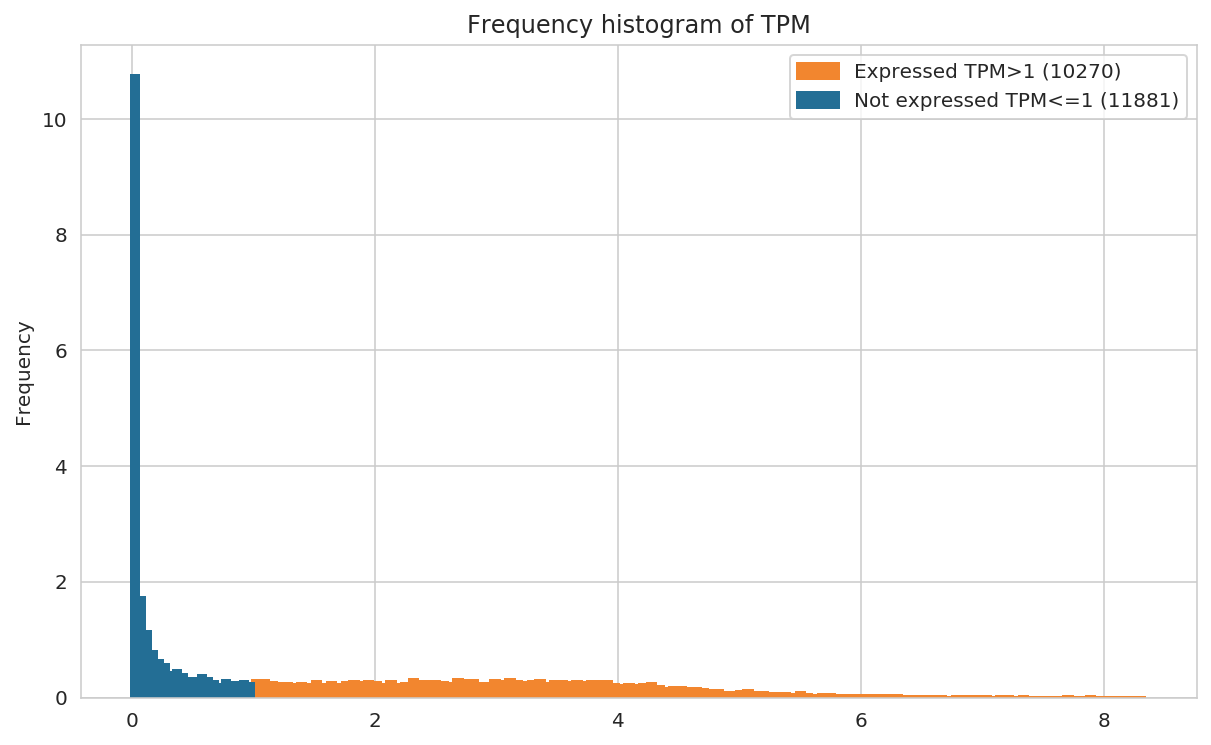

In [383]:
ORANGE = (243/256, 135/256, 47/256)
BLUE = (35/256, 110/256, 150/256)

plt.figure(figsize=(10, 6))
expressed = dff.loc[dff['TPM'] > 1]['TPM']
plt.hist(expessed, bins=120, density=True, color=ORANGE, edgecolor=ORANGE, linewidth=2, 
         label=f'Expressed TPM>1 ({len(expressed)})')

nexpressed = dff.loc[dff['TPM'] <= 1]['TPM']
plt.hist(nexpressed, bins=20, density=True, color=BLUE, edgecolor=BLUE, linewidth=2,
         label=f'Not expressed TPM<=1 ({len(nexpressed)})')
plt.gca().set(title='Frequency histogram of TPM', ylabel='Frequency')
plt.legend()

plt.show()

In [384]:
print('Compute average coverage/peaks')
dff['k36me3_RPM'.format(tool)] = (dff['k36me3_RPM_0'] + dff['k36me3_RPM_1']) / 2    
dff['k36me3_RPKM'.format(tool)] = (dff['k36me3_RPKM_0'] + dff['k36me3_RPKM_1']) / 2    

for tool in TOOLS:
    dff['k36me3_{}_COVERAGE'.format(tool)] =\
        (dff['k36me3_{}_COVERAGE_0'.format(tool)] + dff['k36me3_{}_COVERAGE_1'.format(tool)]) / 2
    dff['k36me3_{}_PEAKS'.format(tool)] =\
        (dff['k36me3_{}_PEAKS_0'.format(tool)] + dff['k36me3_{}_PEAKS_1'.format(tool)]) / 2

Compute average coverage/peaks


Processing MACS2


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Processing SICER


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Processing SPAN


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 360x360 with 0 Axes>

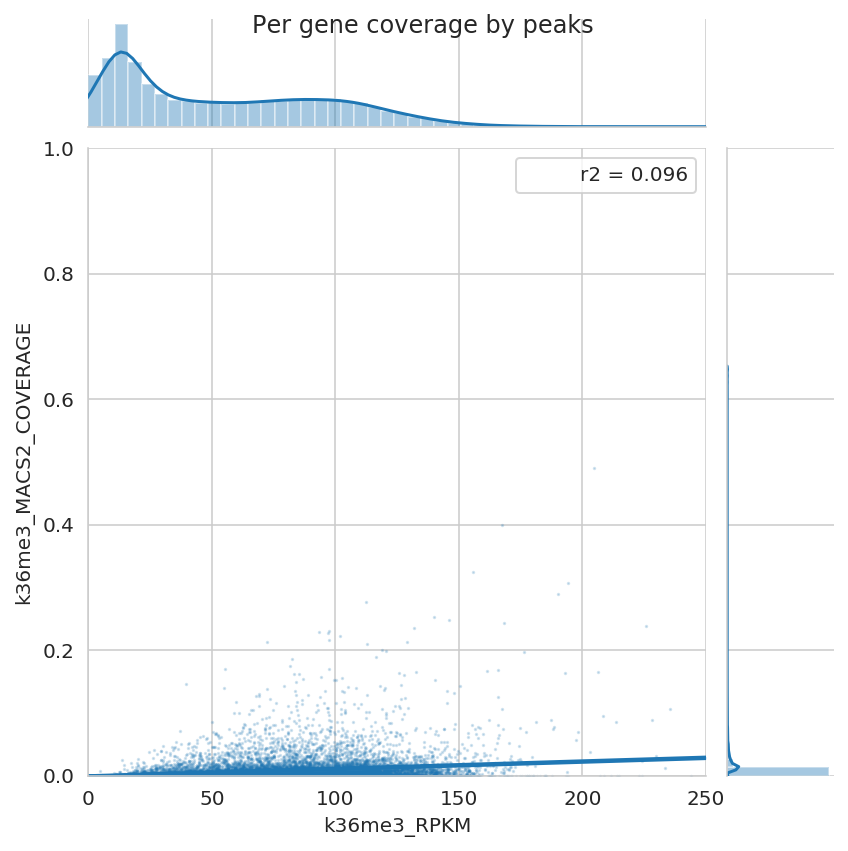

<Figure size 360x360 with 0 Axes>

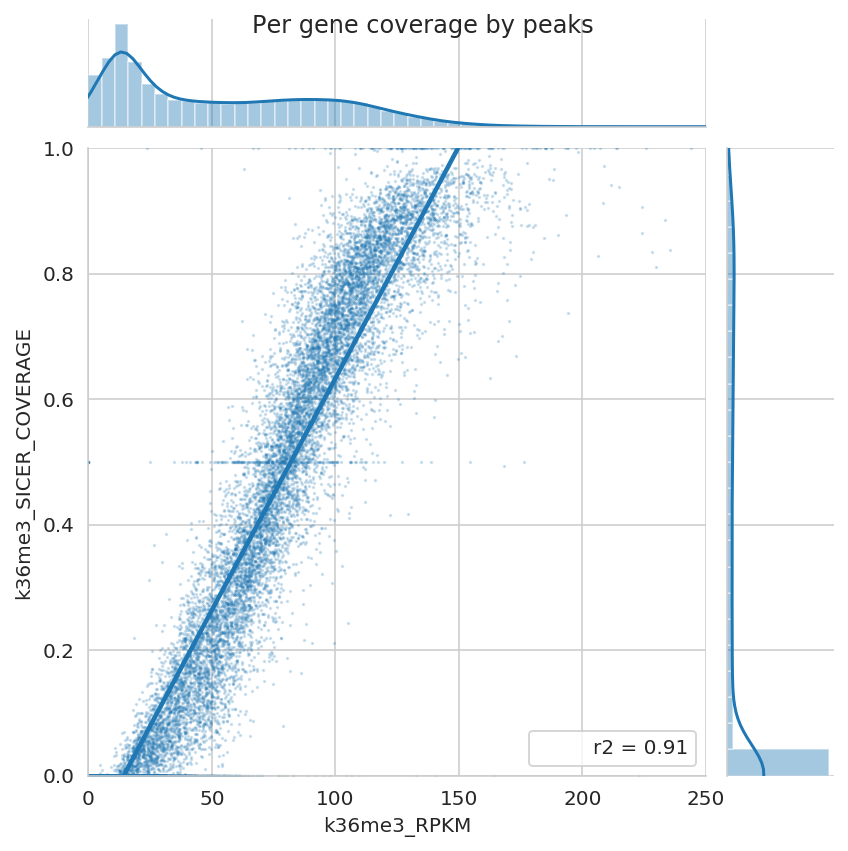

<Figure size 360x360 with 0 Axes>

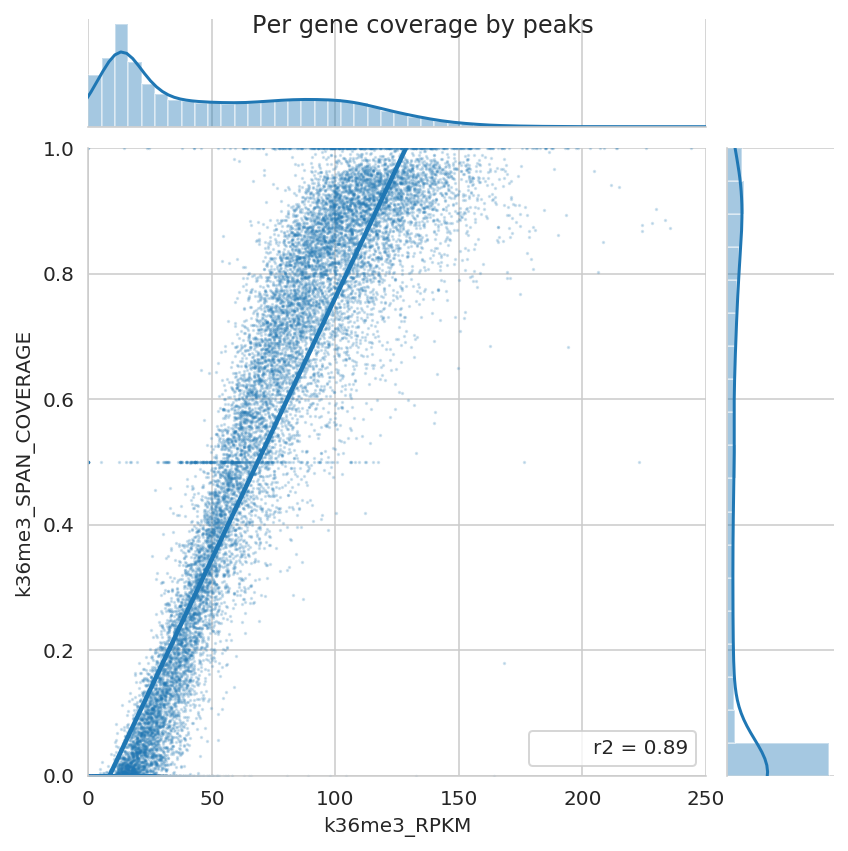

In [385]:
TOOLS = ["MACS2", "SICER", "SPAN"]
for tool in TOOLS:
    print('Processing', tool)
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_coverage_average.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        g = sns.jointplot(dff['k36me3_RPKM'], 
                          dff['k36me3_{}_COVERAGE'.format(tool)], kind="reg", stat_func=r2,
                          joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5)})
        g.ax_marg_x.set_xlim(0, 250)
        g.ax_marg_y.set_ylim(0, 1)
        plt.suptitle('Per gene coverage by peaks')
        pdf.savefig()

# RNA-Seq TPM vs k36me3 RPKM

/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 360x360 with 0 Axes>

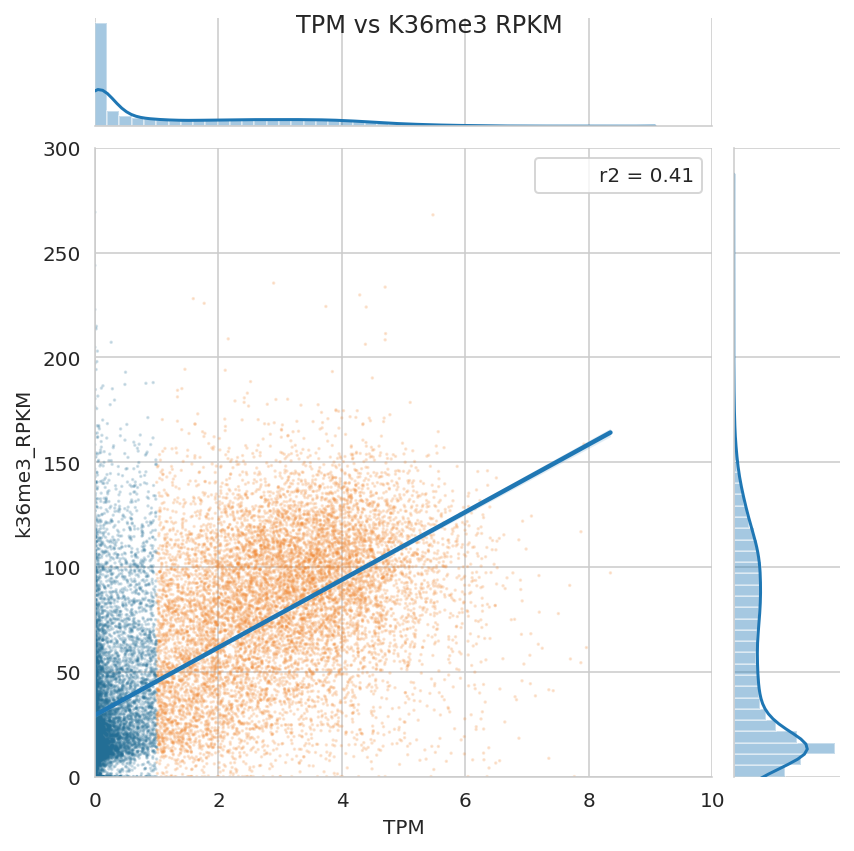

In [386]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

# print('TPM vs H3K36me3 RPKM')
# for s in [0, 1]:
#     plt.figure(figsize=(5, 5))
#     sns.jointplot(dff['TPM_{}'.format(s)], dff['k36me3_RPKM_{}'.format(s)], kind="reg", stat_func=r2,
#                   joint_kws = {'scatter_kws':dict(alpha=0.1, s=0.5)})
#     plt.suptitle('TPM vs K36me3 RPKM {}'.format(s))
#     plt.show()


plt.figure(figsize=(5, 5))
colors = [ORANGE if tpm > 1 else BLUE for tpm in dff['TPM']]
g = sns.jointplot(dff['TPM'], dff['k36me3_RPKM'], kind="reg", stat_func=r2,
                  joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5, color=colors)})
g.ax_marg_x.set_xlim(0, 10)
g.ax_marg_y.set_ylim(0, 300)
plt.suptitle('TPM vs K36me3 RPKM')
plt.show()    

# Intersection ChIP-Seq vs Expressed RNA-Seq

In [387]:
print('tool\treplicate\t(TPM>1)&intsct\t(TPM>1)&Nintsct\t(TPM<=1)&intsct\t(TPM<=1)&Nintsct')
for t in TOOLS:
    for s in [0, 1]:
        dff['expressed_{}'.format(s)] = dff['TPM_{}'.format(s)] > 1
        
        expr_intersect_filter = np.logical_and(
            dff['expressed_{}'.format(s)], 
            dff['k36me3_{}_intersect_{}'.format(t, s)])
        expr_intersect = sum(expr_intersect_filter)
#         print('\t'.join(dff.loc[expr_intersect_filter][:10]['gene_id']))

        expr_nintersect_filter = np.logical_and(
            dff['expressed_{}'.format(s)], 
            np.logical_not(dff['k36me3_{}_intersect_{}'.format(t, s)]))
        expr_nintersect = sum(expr_nintersect_filter)
#         print('\t'.join(dff.loc[expr_nintersect_filter][:10]['gene_id']))

        nexpr_intersect_filter = np.logical_and(
            np.logical_not(dff['expressed_{}'.format(s)]), 
            dff['k36me3_{}_intersect_{}'.format(t, s)])
        nexpr_intersect = sum(nexpr_intersect_filter)
#         print('\t'.join(dff.loc[nexpr_intersect_filter][:10]['gene_id']))

        nexpr_nintersect_filter = np.logical_and(
            np.logical_not(dff['expressed_{}'.format(s)]), 
            np.logical_not(dff['k36me3_{}_intersect_{}'.format(t, s)]))
        nexpr_nintersect = sum(nexpr_nintersect_filter)
#         print('\t'.join(dff.loc[nexpr_nintersect_filter][:10]['gene_id']))
        print(f'{t}\t{s}\t{expr_intersect}\t{expr_nintersect}\t{nexpr_intersect}\t{nexpr_nintersect}')

tool	replicate	(TPM>1)&intsct	(TPM>1)&Nintsct	(TPM<=1)&intsct	(TPM<=1)&Nintsct
MACS2	0	2352	7842	667	11290
MACS2	1	4948	5271	1466	10466
SICER	0	8726	1468	2978	8979
SICER	1	8520	1699	2781	9151
SPAN	0	9408	786	4106	7851
SPAN	1	9217	1002	3820	8112


Transcription vs TOOLS coverage/peaks


/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.

<Figure size 360x360 with 0 Axes>

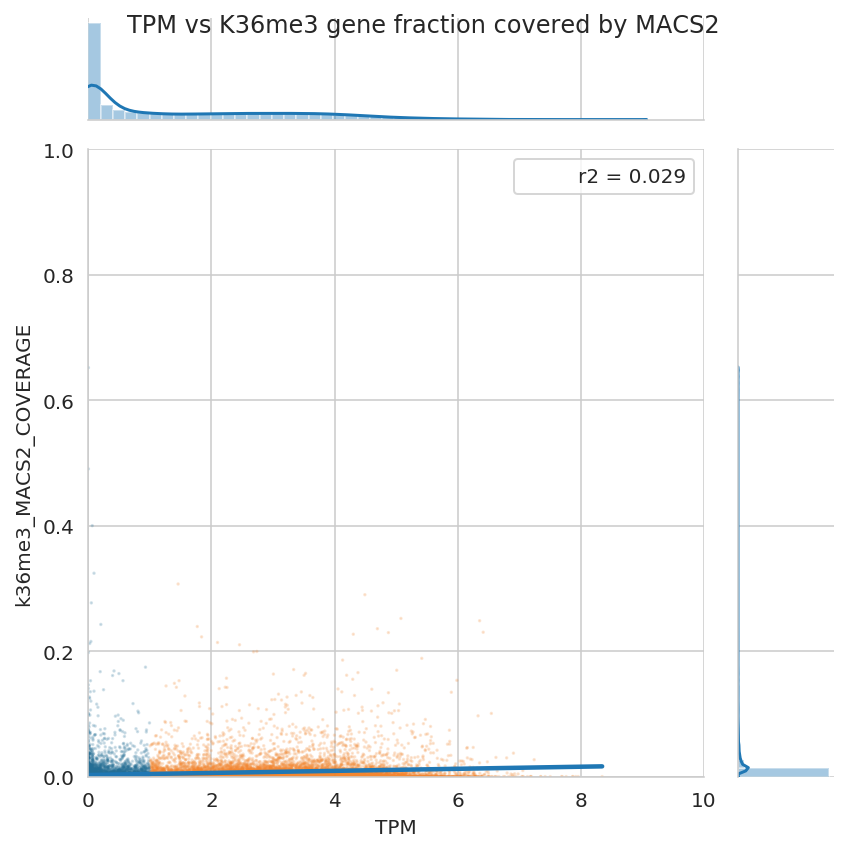

<Figure size 360x360 with 0 Axes>

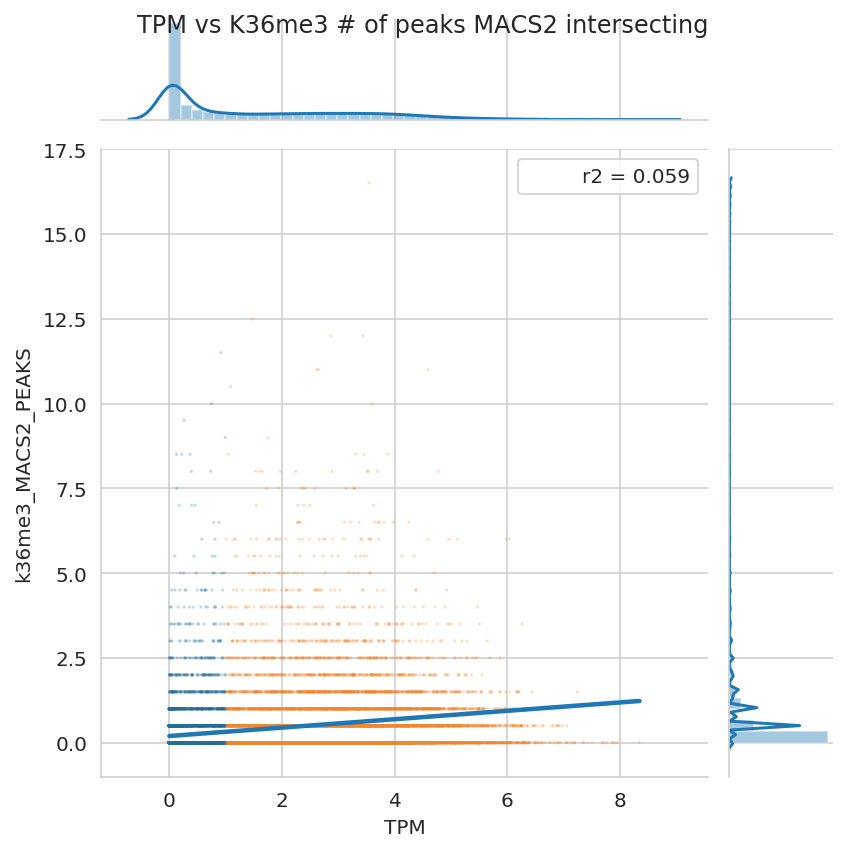

<Figure size 360x360 with 0 Axes>

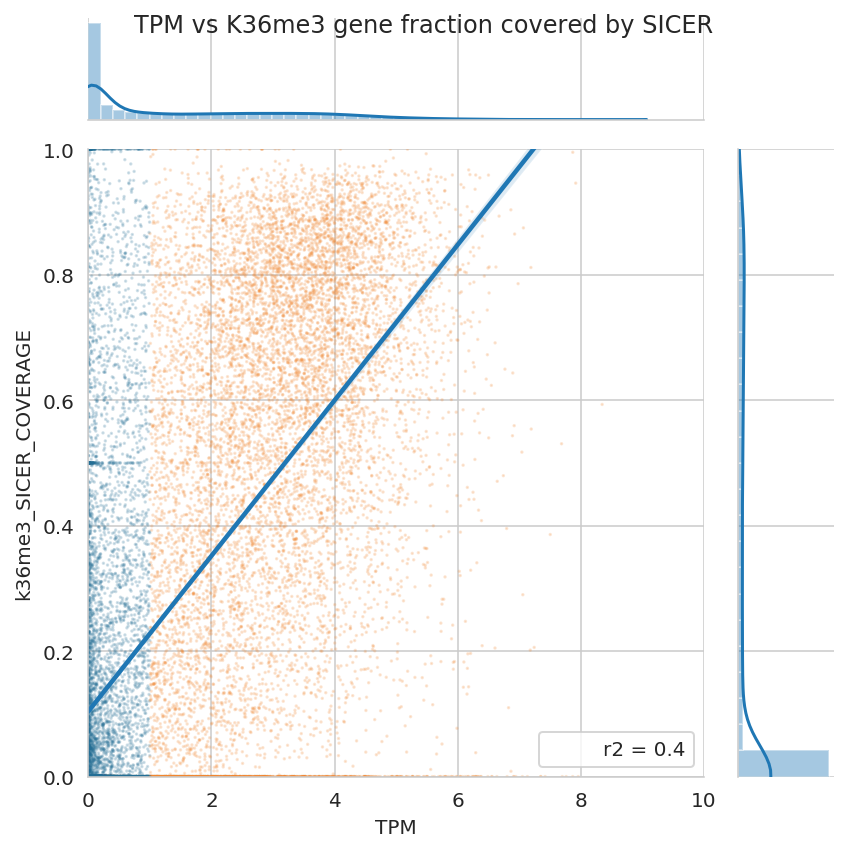

<Figure size 360x360 with 0 Axes>

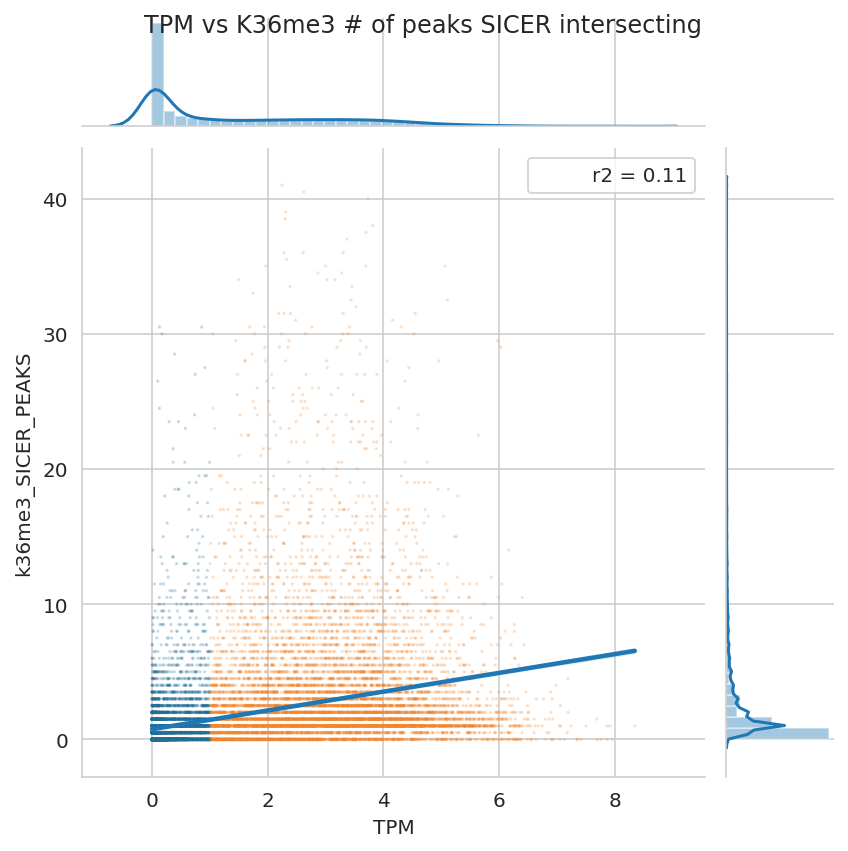

<Figure size 360x360 with 0 Axes>

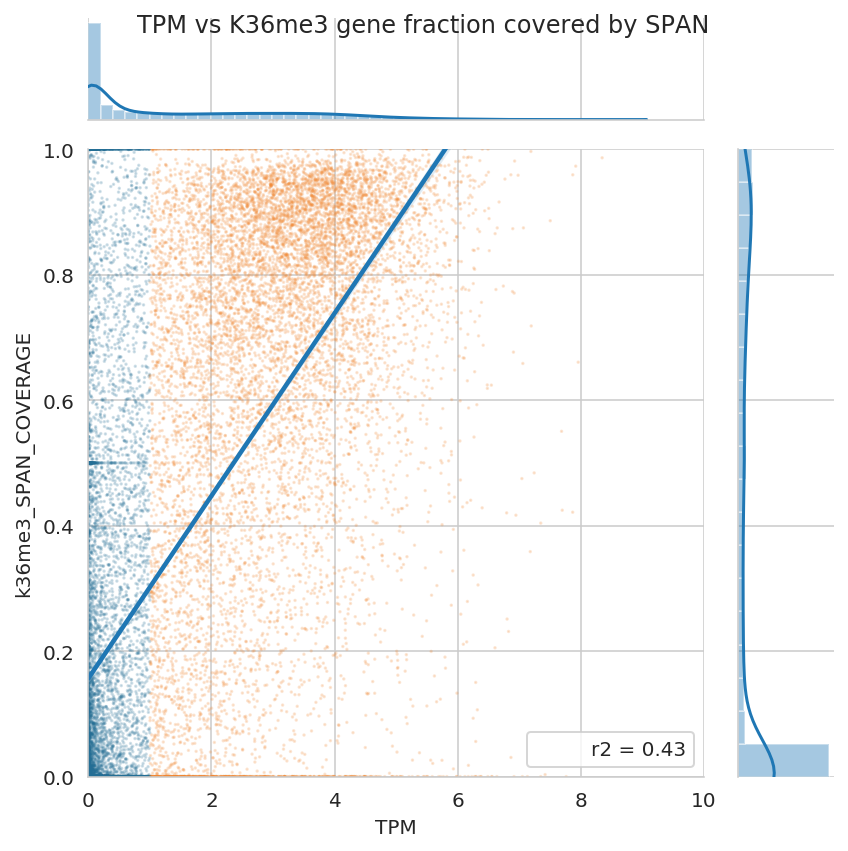

<Figure size 360x360 with 0 Axes>

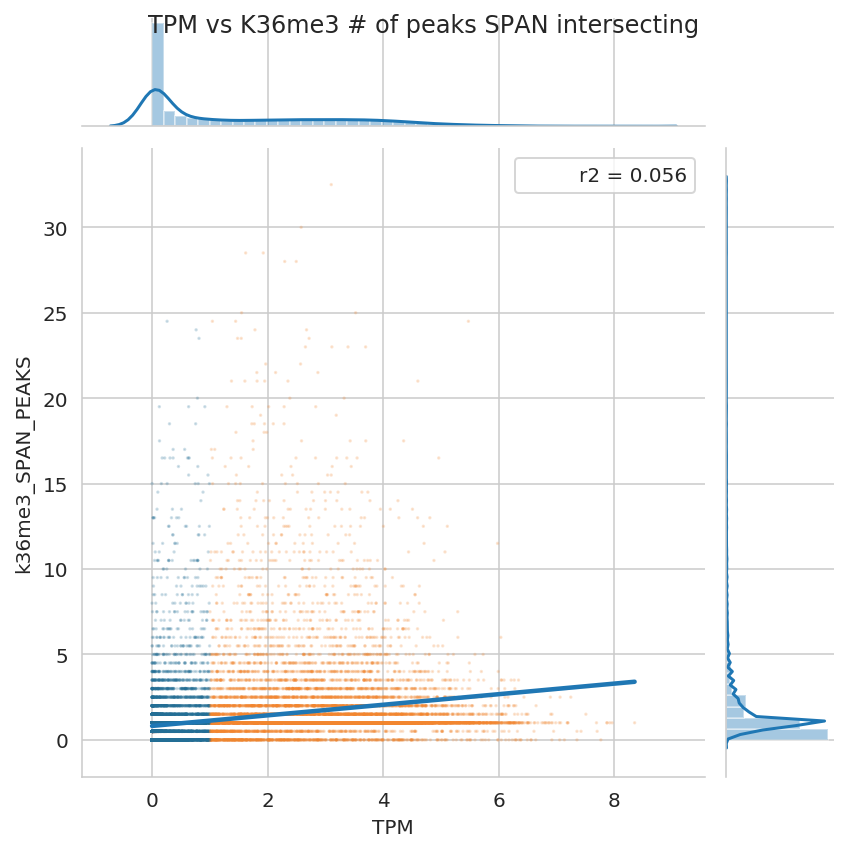

In [388]:
print("Transcription vs TOOLS coverage/peaks")
colors = [ORANGE if tpm > 1 else BLUE for tpm in dff['TPM']]
for tool in TOOLS:
    with PdfPages(os.path.join(FOLDER, 'gse112622_transcription_vs_{}_coverage.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        g = sns.jointplot(dff['TPM'], dff['k36me3_{}_COVERAGE'.format(tool)], kind="reg", stat_func=r2,
                  joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5, color=colors)})
        g.ax_marg_x.set_xlim(0, 10)
        g.ax_marg_y.set_ylim(0, 1)
        plt.suptitle(f'TPM vs K36me3 gene fraction covered by {tool}')        
        plt.tight_layout()
        pdf.savefig()

    with PdfPages(os.path.join(FOLDER, 'gse112622_transcription_vs_{}_peaks.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(5, 5))
        g = sns.jointplot(dff['TPM'], dff['k36me3_{}_PEAKS'.format(tool)], kind="reg", stat_func=r2,
                  joint_kws = {'scatter_kws':dict(alpha=0.2, s=0.5, color=colors)})
        plt.tight_layout()
        plt.suptitle(f'TPM vs K36me3 # of peaks {tool} intersecting')                
        pdf.savefig()

# RNA-Seq expressed / not expressed vs ChIP-Seq Coverage

Processing average values


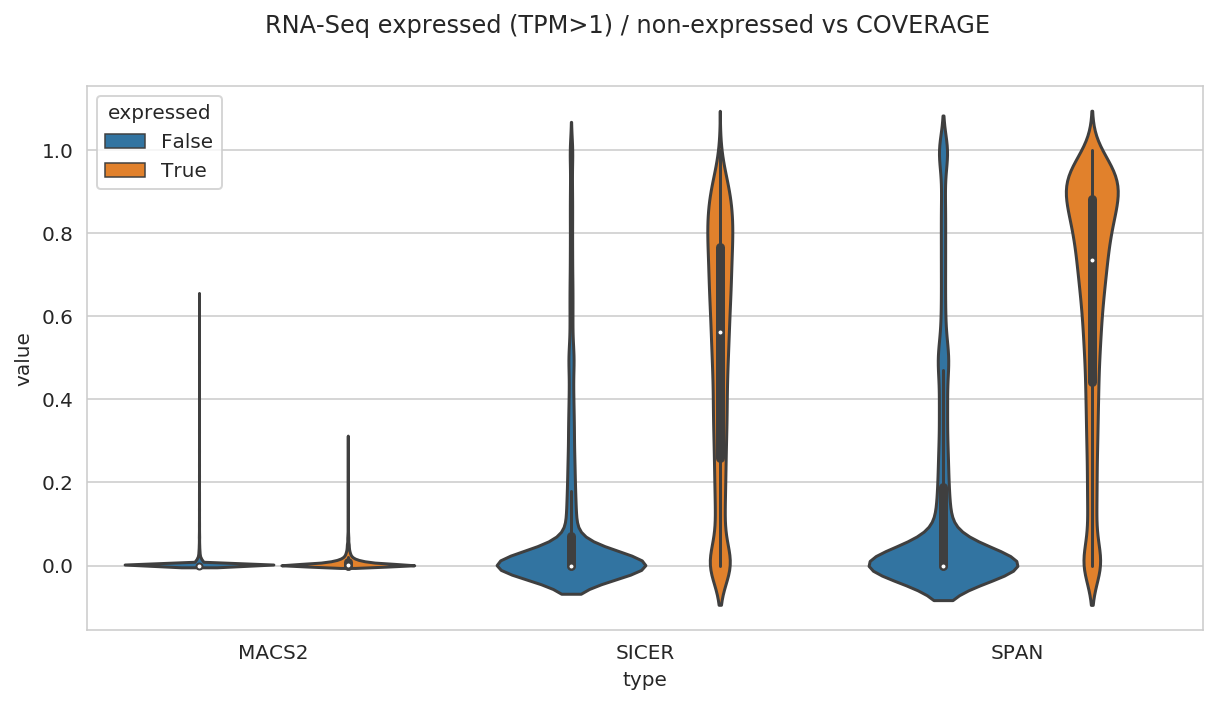

In [389]:
def mod(x):
    if "expr" in x:
        return "Expression"
    if "RPKM" in x:
        return "RPKM"
    if "MACS2" in x:
        return "MACS2"
    if "SICER" in x:
        return "SICER"
    if "SPAN" in x: 
        return "SPAN"
    return "NA"

# print('Processing per sample')    
# for sample in [0, 1]:
#     # Split expressed and not expressed genes
#     dff['expressed_{}'.format(sample)] = dff['TPM_{}'.format(sample)] > 1
#     with PdfPages(os.path.join(FOLDER, 'gse112622_transcription_vs_coverage_{}.pdf'.format(sample))) as pdf:
#         plt.figure(figsize=(10, 5))
#         dfm = pd.melt(dff, id_vars=['expressed_{}'.format(sample)], 
#                 value_vars=['k36me3_MACS2_COVERAGE_{}'.format(sample), 
#                             'k36me3_SICER_COVERAGE_{}'.format(sample),
#                             'k36me3_SPAN_COVERAGE_{}'.format(sample)])
#         dfm['type'] = [mod(x) for x in dfm['variable']]
#         sns.violinplot(x='type', y='value', hue='expressed_{}'.format(sample), data=dfm)
#         plt.suptitle('RNA-Seq expressed (TPM>1) / non-expressed vs COVERAGE {}'.format(sample))
#         pdf.savefig()


print('Processing average values')
with PdfPages(os.path.join(FOLDER, 'gse112622_summary_transcription_vs_coverage.pdf')) as pdf:
    plt.figure(figsize=(10, 5))
    # Split expressed and not expressed genes
    dff['expressed'] = dff['TPM'] > 1
    dfm = pd.melt(dff, id_vars=['expressed'], 
            value_vars=['k36me3_MACS2_COVERAGE', 
                        'k36me3_SICER_COVERAGE',
                        'k36me3_SPAN_COVERAGE'])
    dfm['type'] = [mod(x) for x in dfm["variable"]]
    sns.violinplot(x='type', y='value', hue='expressed', data=dfm)
    plt.suptitle('RNA-Seq expressed (TPM>1) / non-expressed vs COVERAGE')
    pdf.savefig()

# Difference in k36me3 intersect => RNA-Seq?

Processing MACS2
Processing SICER
Processing SPAN


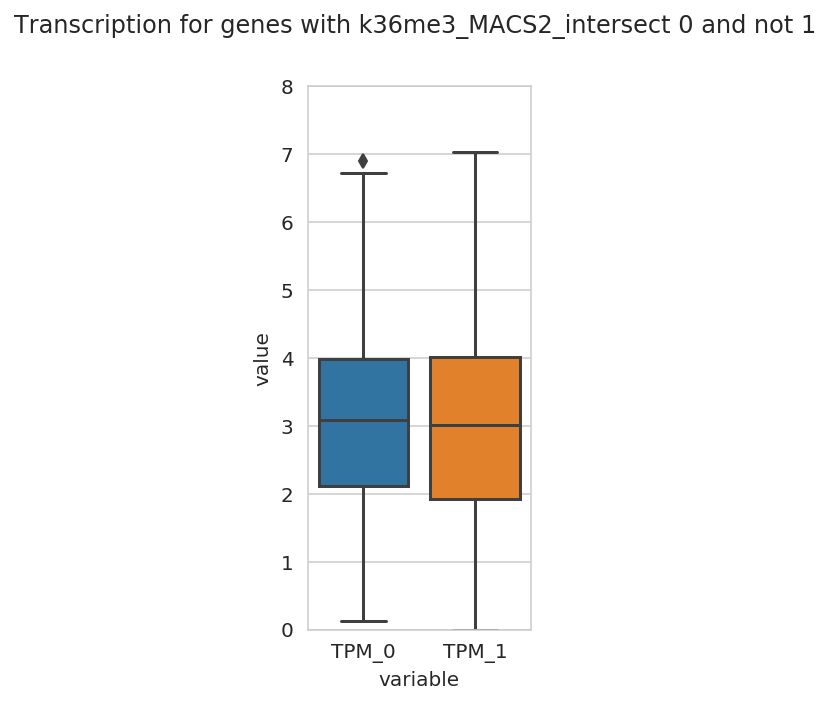

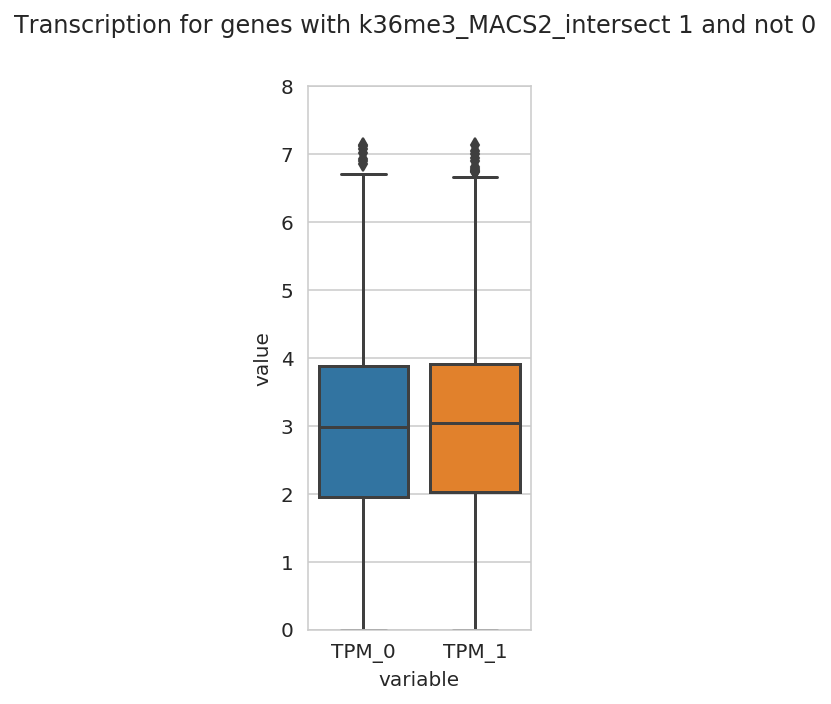

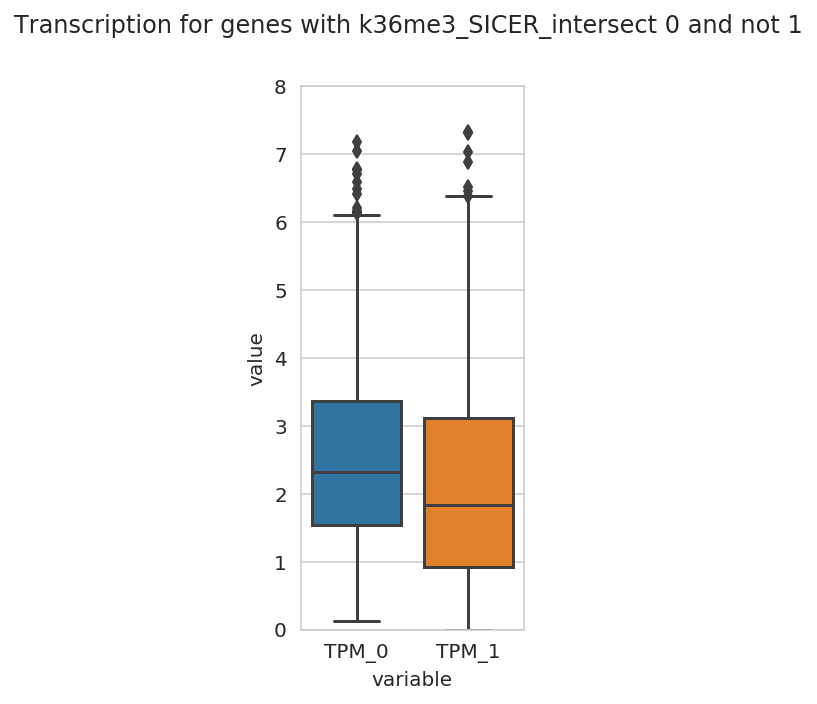

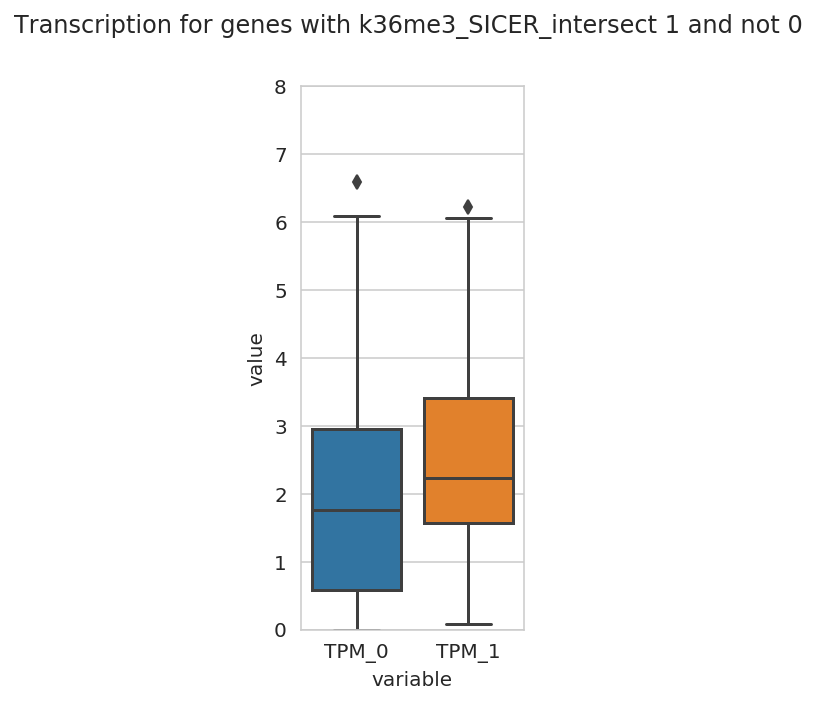

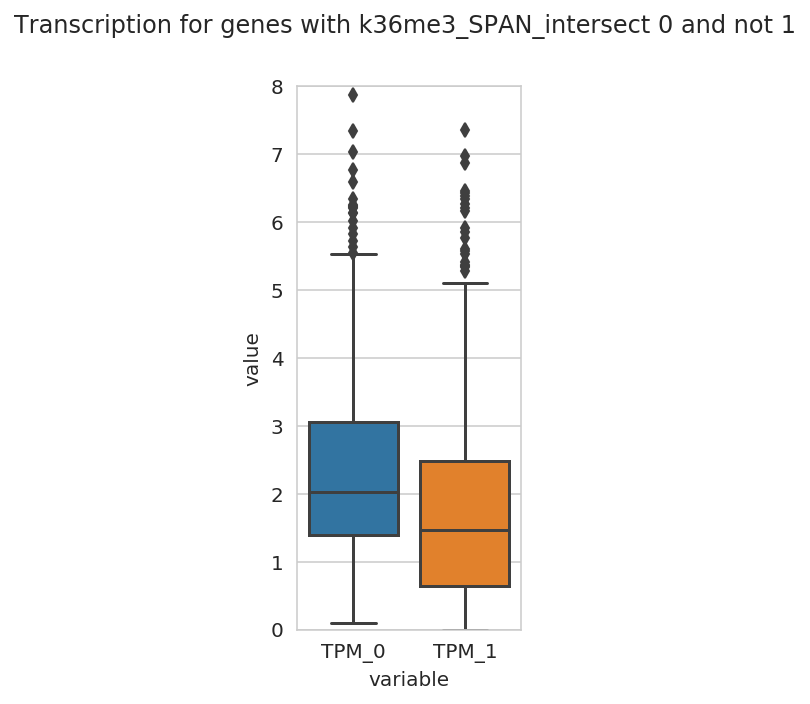

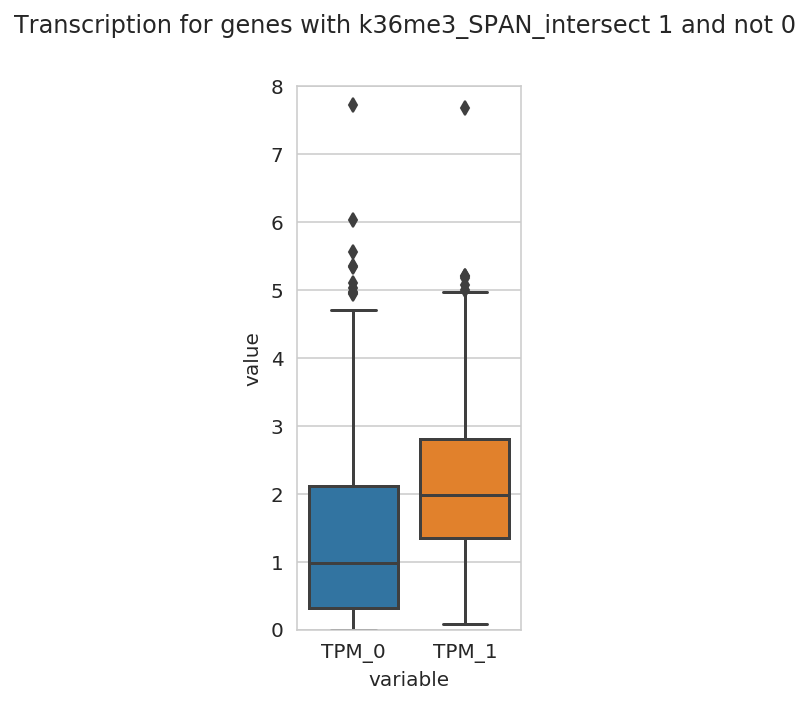

In [390]:
##########################################################
# Work only with genes, expressed in at least one sample #
##########################################################
dft = dff.loc[np.logical_or(dff['TPM_0'] > 1, dff['TPM_1'] > 1)]

for tool in TOOLS:
    print('Processing', tool)
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_t_1.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(2, 5))
        diff = dft.loc[np.logical_and(dft['k36me3_{}_intersect_0'.format(tool)],
                                      np.logical_not(dft['k36me3_{}_intersect_1'.format(tool)]))]
        if len(diff) > 0:
            g = sns.boxplot(x="variable", y="value", data=pd.melt(diff, value_vars=['TPM_0', 'TPM_1']))
            g.set_ylim([0, 8])
            plt.suptitle('Transcription for genes with k36me3_{}_intersect 0 and not 1'.format(tool))
            pdf.savefig()
        else:
            print('NOTHING 0 < 1')
        
    with PdfPages(os.path.join(FOLDER, 'gse112622_{}_t_0.pdf'.format(tool))) as pdf:
        plt.figure(figsize=(2, 5))
        diff = dft.loc[np.logical_and(dft['k36me3_{}_intersect_1'.format(tool)],
                                      np.logical_not(dft['k36me3_{}_intersect_0'.format(tool)]))]
        if len(diff) > 0:
            g = sns.boxplot(x="variable", y="value", data=pd.melt(diff, value_vars=['TPM_0', 'TPM_1']))
            g.set_ylim([0, 8])
            plt.suptitle('Transcription for genes with k36me3_{}_intersect 1 and not 0'.format(tool))
            pdf.savefig()
        else:
            print('NOTHING 0 > 1')

# Hierarchical clustering

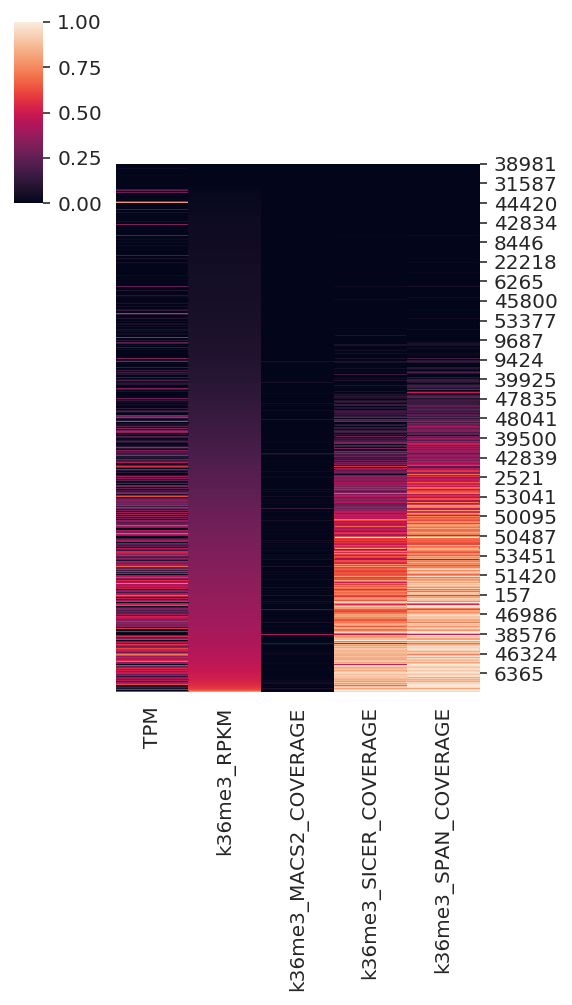

In [391]:
dff['k36me3_RPKM'] = (dff['k36me3_RPKM_0'] + dff['k36me3_RPKM_1']) / 2
dff['k36me3_RPM'] = (dff['k36me3_RPM_0'] + dff['k36me3_RPM_1']) / 2

# dfc = dff[['k36me3_RPKM_0', 'k36me3_RPKM_1', 'k36me3_RPKM',
#            'k36me3_RPM_0', 'k36me3_RPM_1', 'k36me3_RPM',
#            'TPM_0', 'TPM_1', 'TPM', 
#            'FPKM_0', 'FPKM_1', 'FPKM',
#            'k36me3_MACS2_COVERAGE_0','k36me3_MACS2_COVERAGE_1', 'k36me3_MACS2_COVERAGE', 
#            'k36me3_SICER_COVERAGE_0', 'k36me3_SICER_COVERAGE_1', 'k36me3_SICER_COVERAGE',
#            'k36me3_SPAN_COVERAGE_0', 'k36me3_SPAN_COVERAGE_1', 'k36me3_SPAN_COVERAGE']]

dfc = dff[['TPM','k36me3_RPKM', 'k36me3_MACS2_COVERAGE', 'k36me3_SICER_COVERAGE', 'k36me3_SPAN_COVERAGE']].copy()
dfc.sort_values(by=['k36me3_RPKM'], inplace=True)
with PdfPages(os.path.join(FOLDER, 'gse112622_clustering.pdf')) as pdf:
    sns.clustermap(dfc, figsize=(4, 7), standard_scale=1, col_cluster=False, row_cluster=False)
    pdf.savefig()

In [392]:
dfc.reset_index(inplace=True, drop=True)
dfc

TPM  k36me3_RPKM  k36me3_MACS2_COVERAGE  k36me3_SICER_COVERAGE  \
0      0.000000     0.000000               0.000000               0.000000   
1      0.000000     0.000000               0.000000               0.000000   
2      0.000000     0.000000               0.000000               0.000000   
3      0.000000     0.000000               0.000000               0.000000   
4      0.000000     0.000000               0.000000               0.000000   
...         ...          ...                    ...                    ...   
22146  4.700651   233.572142               0.012522               0.885978   
22147  2.894674   235.482970               0.106828               0.837927   
22148  0.000000   243.917410               0.000000               1.000000   
22149  5.475095   268.041230               0.042807               0.898525   
22150  0.000000   269.325474               0.651786               1.000000   

       k36me3_SPAN_COVERAGE  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
...                     ...  
22146              0.885286  
22147              0.873650  
22148              1.000000  
22149              0.898610  
22150              1.000000  

[22151 rows x 5 columns]

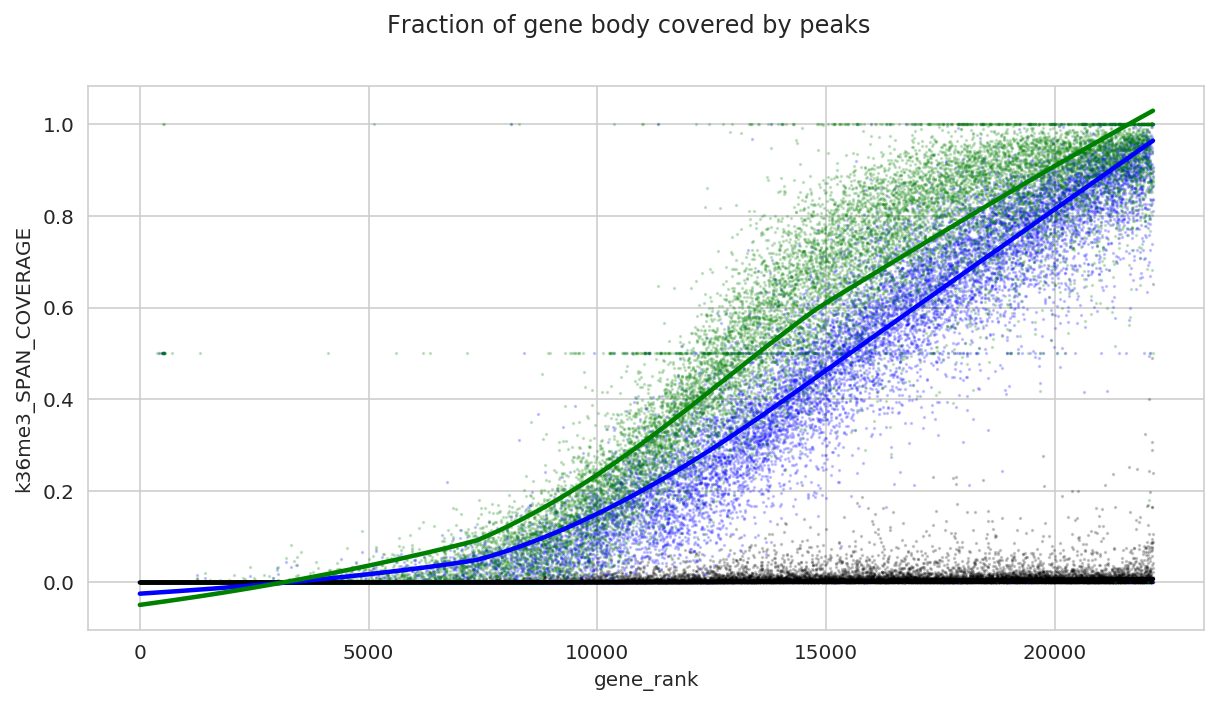

In [393]:
plt.figure(figsize=(10, 5))
dfc['gene_rank'] = list(dfc.index)
sns.regplot(x='gene_rank', y='k36me3_MACS2_COVERAGE', color="black", label="MACS2", data=dfc, lowess=True,
           scatter_kws=dict(alpha=0.2, s=0.5))
sns.regplot(x='gene_rank', y='k36me3_SICER_COVERAGE', color="blue", label="SICER", data=dfc, lowess=True,
           scatter_kws=dict(alpha=0.2, s=0.5))
sns.regplot(x='gene_rank', y='k36me3_SPAN_COVERAGE', color="green", label="SPAN", data=dfc, lowess=True,
           scatter_kws=dict(alpha=0.2, s=0.5))
plt.suptitle('Fraction of gene body covered by peaks')
plt.show()

# RSEM DE vs intersection / coverage


```
library(DESeq2)

tableFiles <- list.files("/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/rnaseq/fastq_bams_rsem", pattern = "*.genes.results", recursive = F)
geneTables <- lapply(tableFiles, function(x) read.table(paste("/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/rnaseq/fastq_bams_rsem", x, sep = "/"), sep="\t", header=1, row.names=1))
countsTable <- do.call(cbind, lapply(geneTables, function(x) x[, "expected_count", drop=F]))
colnames(countsTable) <- tableFiles
countsPure <- as.matrix(countsTable)
countsPure <- floor(countsPure)
expressedGenes <- rowSums(countsPure) > 0
countsPure <- countsPure[expressedGenes, ]

write.table(file = '/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/rnaseq/fastq_bams_rsem/counts.tsv', x = countsPure, sep='\t')

colData <- data.frame(
    cellType = c("C57BL_6J", "C57BL_6J", "CAST_EiJ", "CAST_EiJ"),
    row.names = colnames(countsPure)
)

dds <- DESeqDataSetFromMatrix(countData = countsPure,
                              colData = colData,
                              design = ~cellType)

dds <- DESeq(dds)
res <- results(dds, name="cellType_CAST_EiJ_vs_C57BL_6J")
res <- res[order(res$stat), ]
res <- lfcShrink(dds, coef="cellType_CAST_EiJ_vs_C57BL_6J", type="apeglm")
write.table(file = '/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/rnaseq/fastq_bams_rsem/diff.tsv', x = res, sep='\t')
```

In [394]:
de = pd.read_csv('/mnt/stripe/shpynov/2020_GSE112622_k36me3_vs_rnaseq/rnaseq/fastq_bams_rsem/diff.tsv', 
                 sep='\t', comment='#').dropna()
de.index.name = 'gene_id'
display(de.head())

baseMean  log2FoldChange     lfcSE       stat  \
gene_id                                                                 
ENSMUSG00000038770   8050.468316       -5.856001  0.182507 -32.086415   
ENSMUSG00000026880   4642.954858       -6.102759  0.205639 -29.676981   
ENSMUSG00000079424   3205.339960       -7.419889  0.254464 -29.158923   
ENSMUSG00000058248  11758.709519       -4.628967  0.173420 -26.692159   
ENSMUSG00000107740   2681.032318       -8.735126  0.353275 -24.726169   

                           pvalue           padj  
gene_id                                           
ENSMUSG00000038770  6.821227e-226  1.474204e-221  
ENSMUSG00000026880  1.522015e-193  1.644690e-189  
ENSMUSG00000079424  6.438569e-187  4.638345e-183  
ENSMUSG00000058248  5.804465e-157  2.090768e-153  
ENSMUSG00000107740  5.595608e-135  1.007769e-131

# Top DE genes

In [395]:
top_genes_0 = de.loc[de['log2FoldChange'] > 0].sort_values(by=['padj'])[:500]
display(top_genes_0.head(1))
top_genes_1 = de.loc[de['log2FoldChange'] < 0].sort_values(by=['padj'])[:500]
display(top_genes_1.head(1))

de0 = set(list(top_genes_0.index))
dfde0 = dff.loc[[g in de0 for g in dff['gene_id']]] 
dfde0['de'] = 0

de1 = set(list(top_genes_1.index))
dfde1 = dff.loc[[g in de1 for g in dff['gene_id']]] 
dfde1['de'] = 1

dfde = pd.concat([dfde0, dfde1])
display(dfde.head(3))

baseMean  log2FoldChange     lfcSE       stat  \
gene_id                                                                
ENSMUSG00000020674  2368.029871        6.985616  0.249475  28.001253   

                           pvalue           padj  
gene_id                                           
ENSMUSG00000020674  1.568688e-172  8.475623e-169

baseMean  log2FoldChange     lfcSE       stat  \
gene_id                                                                
ENSMUSG00000038770  8050.468316       -5.856001  0.182507 -32.086415   

                           pvalue           padj  
gene_id                                           
ENSMUSG00000038770  6.821227e-226  1.474204e-221

/home/user/anaconda/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/anaconda/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


gene_id gene_symbol  coding    chr     start       end  \
51196  ENSMUSG00000096054       Syne1       1  chr10   5020916   5551482   
47498  ENSMUSG00000019889       Ptprk       1  chr10  28074819  28597397   
50729  ENSMUSG00000056222      Spock1       1  chr13  57421194  57908332   

       FPKM_0_0  FPKM_0_1  FPKM_1_0  FPKM_1_1  ...  k36me3_MACS2_COVERAGE  \
51196      2.72      3.13     19.24     15.16  ...               0.004389   
47498      1.05      0.80      8.46      6.60  ...               0.003887   
50729      1.80      1.28     13.96     13.62  ...               0.004271   

       k36me3_MACS2_PEAKS  k36me3_SICER_COVERAGE  k36me3_SICER_PEAKS  \
51196                 6.5               0.538493                36.0   
47498                 5.5               0.351096                24.0   
50729                 5.5               0.438638                29.0   

       k36me3_SPAN_COVERAGE  k36me3_SPAN_PEAKS  expressed_0  expressed_1  \
51196              0.732991               18.5         True         True   
47498              0.473225               14.0        False         True   
50729              0.634945               21.0         True         True   

       expressed  de  
51196       True   0  
47498       True   0  
50729       True   0  

[3 rows x 56 columns]

# Top DE genes vs k36me3 peaks intersection

In [396]:
for t in TOOLS:
    print('Processing {}'.format(t))
    for detype in [0, 1]:
        print('DE {}'.format(detype))
        dfdet = dfde.loc[dfde['de'] == detype]
        
        itt_filter = np.logical_and(
            dfdet['k36me3_{}_intersect_0'.format(t)], 
            dfdet['k36me3_{}_intersect_1'.format(t)])
        print('Intersection TRUE TRUE {}'.format(sum(itt_filter)))
#         print('\t'.join(dfdet.loc[itt_filter][:20]['gene_id']))

        itf_filter = np.logical_and(
            dfdet['k36me3_{}_intersect_0'.format(t)], 
            np.logical_not(dfdet['k36me3_{}_intersect_1'.format(t)]))
        print('Intersection TRUE FALSE {}'.format(sum(itf_filter)))
#         print('\t'.join(dfdet.loc[itf_filter][:20]['gene_id']))

        ift_filter = np.logical_and(
            np.logical_not(dfdet['k36me3_{}_intersect_0'.format(t)]), 
            dfdet['k36me3_{}_intersect_1'.format(t)])
        print('Intersection FALSE TRUE {}'.format(sum(ift_filter)))
#         print('\t'.join(dfdet.loc[ift_filter][:20]['gene_id']))

        iff_filter = np.logical_and(
            np.logical_not(dfdet['k36me3_{}_intersect_0'.format(t)]), 
            np.logical_not(dfdet['k36me3_{}_intersect_1'.format(t)]))
        print('Intersection FALSE FALSE {}'.format(sum(iff_filter)))
#         print('\t'.join(dfdet.loc[iff_filter][:20]['gene_id'])

Processing MACS2
DE 0
Intersection TRUE TRUE 49
Intersection TRUE FALSE 11
Intersection FALSE TRUE 146
Intersection FALSE FALSE 173
DE 1
Intersection TRUE TRUE 75
Intersection TRUE FALSE 39
Intersection FALSE TRUE 93
Intersection FALSE FALSE 194
Processing SICER
DE 0
Intersection TRUE TRUE 209
Intersection TRUE FALSE 14
Intersection FALSE TRUE 83
Intersection FALSE FALSE 73
DE 1
Intersection TRUE TRUE 231
Intersection TRUE FALSE 104
Intersection FALSE TRUE 5
Intersection FALSE FALSE 61
Processing SPAN
DE 0
Intersection TRUE TRUE 260
Intersection TRUE FALSE 5
Intersection FALSE TRUE 71
Intersection FALSE FALSE 43
DE 1
Intersection TRUE TRUE 278
Intersection TRUE FALSE 93
Intersection FALSE TRUE 1
Intersection FALSE FALSE 29


# Top DE genes vs k36me3 peaks coverage

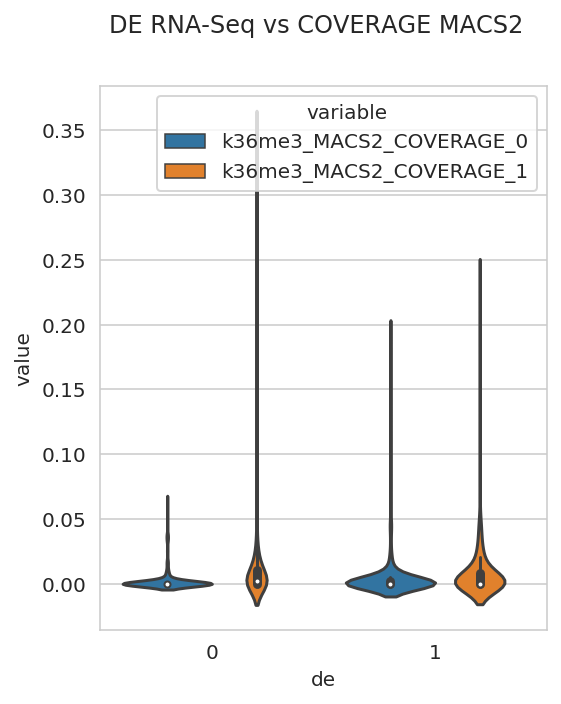

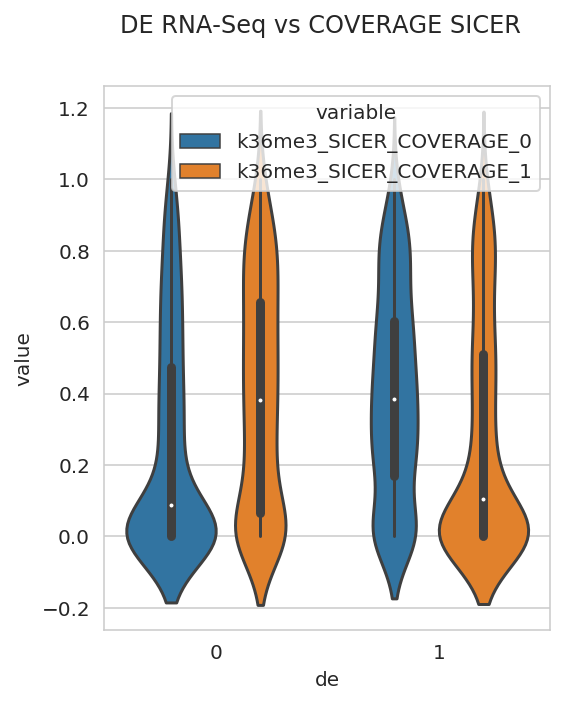

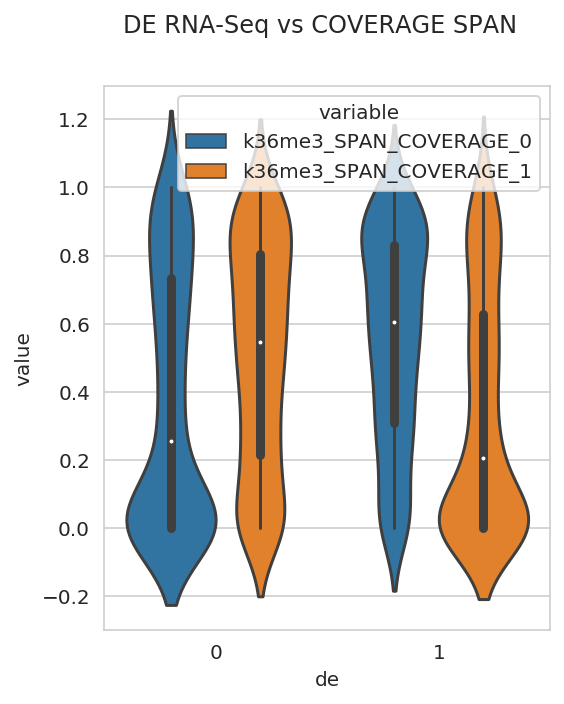

In [397]:
for t in TOOLS:
    with PdfPages(os.path.join(FOLDER, 'gse112622_de_vs_coverage_{}.pdf'.format(t))) as pdf:
        plt.figure(figsize=(4, 5))
        dfdem = pd.melt(dfde, id_vars=['de'], 
                value_vars=['k36me3_{}_COVERAGE_0'.format(t), 'k36me3_{}_COVERAGE_1'.format(t)])
        sns.violinplot(x='de', y='value', hue='variable', data=dfdem)
#         display(dfdem.head(20))
        plt.suptitle('DE RNA-Seq vs COVERAGE {}'.format(t))
        pdf.savefig()